In [1]:
import pandas as pd
import re
import argparse
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import missingno as msno
import researchpy as rp
import scipy.stats as stats


# pd.set_option("display.max_columns", None)
# input_folder = 'data/data/train'
# # Reading input folder
# files = os.listdir(input_folder)

# #df_std = df_std.append(tmp.std(), ignore_index=True)


# input_folder = 'data/data/train'
# # Reading input folder
# filesnames = os.listdir(input_folder)
# regex = re.compile(r'\d+')
# ids = [int(x) for x in regex.findall(str(files))]
# dfs = list()

# for patient_id, filename in enumerate(filesnames):    
#     pdf = pd.read_csv(input_folder + "/" + filename, sep='|')   
#     sepsislabel_true_list = pdf[pdf['SepsisLabel'] == 1].index
#     if not sepsislabel_true_list.empty:
#         pdf = pdf[:min(pdf[pdf['SepsisLabel'] == 1].index)+1]
#         pdf['SepsisLabel'] = 1
#     pdf['patient_id'] = ids[patient_id]
#     dfs.append(pdf)
# df = pd.concat(dfs, axis=0, ignore_index=True)


In [2]:
file_name = 'df.pkl'

# Save dataframe to pickled pandas object
#df.to_pickle(file_name) # where to save it usually as a .plk

# Load dataframe from pickled pandas object
df = pd.read_pickle(file_name)


In [4]:
# lab test features
labs = ['BaseExcess','HCO3','FiO2','pH','PaCO2','SaO2','AST','BUN','Alkalinephos','Calcium','Chloride','Creatinine','Bilirubin_direct','Glucose','Lactate',
      'Magnesium','Phosphate','Potassium','Bilirubin_total','TroponinI','Hct','Hgb','PTT','WBC','Fibrinogen','Platelets']

# vital signal features
vitals = ['HR','O2Sat','Temp','SBP','MAP','DBP','Resp','EtCO2']

# demographic features
demogs = ['Age','Gender','Unit1','Unit2','HospAdmTime','ICULOS']

# labels
labels = ['SepsisLabel']

In [6]:
labs_df = df[labs]
vitals_df = df[vitals]
demogs_df = df[demogs]
df_sepsis = df[df['SepsisLabel'] == 1]
df_not_sepsis = df[df['SepsisLabel'] == 0]

In [5]:
data_mean = df.groupby('patient_id').mean()
data_sepsis_mean = df_sepsis.groupby('patient_id').mean()
data_not_sepsis_mean = df_not_sepsis.groupby('patient_id').mean()

In [42]:
percent_missing = df.isnull().sum() * 100 / len(df)
percent_missing.sort_values()

patient_id           0.000000
ICULOS               0.000000
HospAdmTime          0.000000
Gender               0.000000
Age                  0.000000
SepsisLabel          0.000000
HR                   9.952611
MAP                 12.551122
O2Sat               13.120266
SBP                 14.710585
Resp                15.460834
DBP                 31.222402
Unit1               38.910491
Unit2               38.910491
Temp                66.091251
Glucose             82.850280
Potassium           90.725169
Hct                 91.158519
FiO2                91.843321
Hgb                 92.644177
pH                  93.096075
BUN                 93.185898
WBC                 93.637266
Magnesium           93.747491
Creatinine          93.950984
Platelets           94.102014
Calcium             94.189320
PaCO2               94.488598
BaseExcess          94.592597
Chloride            95.525670
HCO3                95.882446
Phosphate           96.056660
EtCO2               96.539956
SaO2      

In [7]:
plt.rcParams["figure.figsize"] = (20,5)

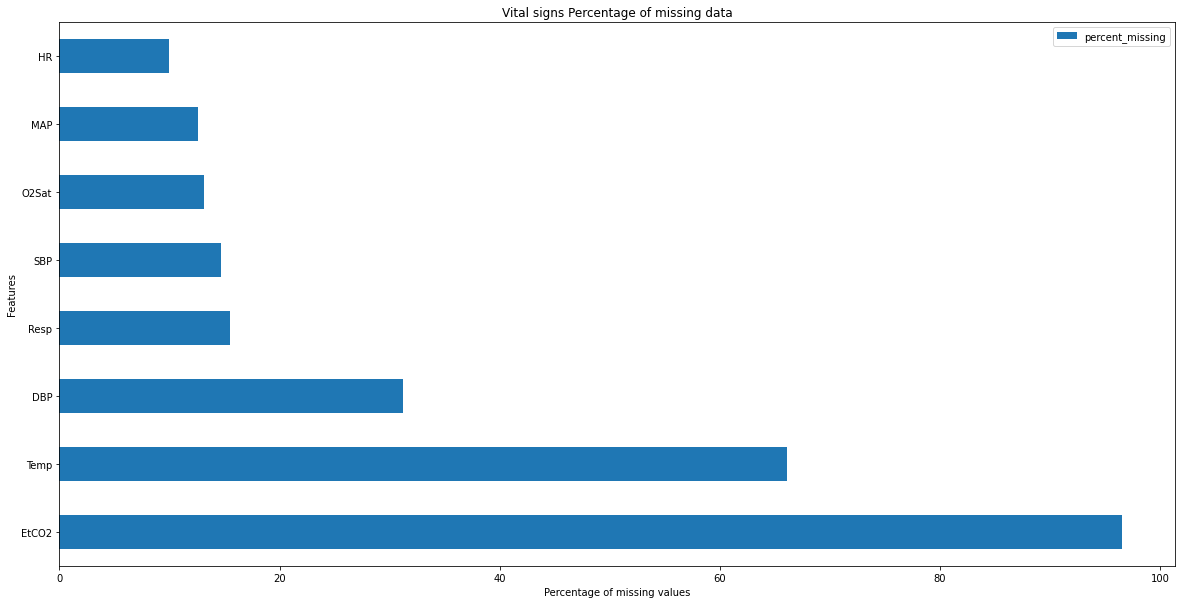

In [9]:
vitals_percent_missing = vitals_df.isnull().sum() * 100 / len(vitals_df)
vitals_missing_value_df = pd.DataFrame({'column_name': vitals_df.columns,
                                 'percent_missing': vitals_percent_missing})
vitals_missing_value_df.sort_values('percent_missing', inplace=True,ascending=False)
vitals_missing_value_df.plot.barh(figsize=(20,10))
plt.xlabel('Percentage of missing values')
plt.ylabel('Features')
plt.title(f'Vital signs Percentage of missing data')
plt.show()

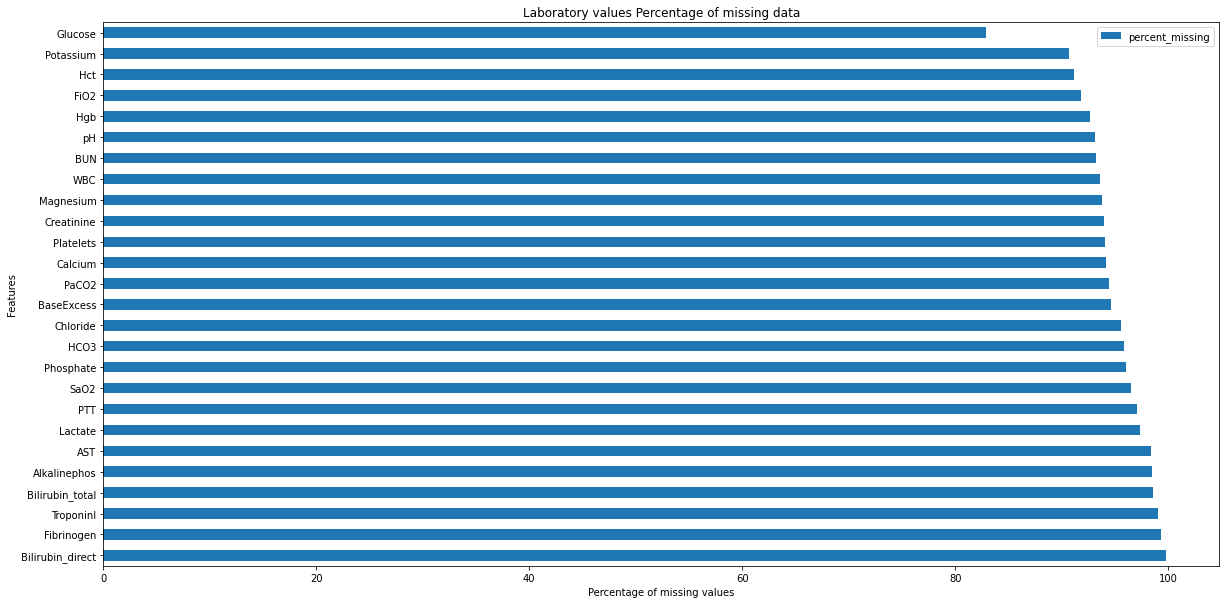

In [10]:
labs_percent_missing = labs_df.isnull().sum() * 100 / len(labs_df)
labs_missing_value_df = pd.DataFrame({'column_name': labs_df.columns,
                                 'percent_missing': labs_percent_missing})
labs_missing_value_df.sort_values('percent_missing', inplace=True,ascending=False)
labs_missing_value_df.plot.barh(figsize=(20,10))
plt.xlabel('Percentage of missing values')
plt.ylabel('Features')
plt.title(f'Laboratory values Percentage of missing data')
plt.show()

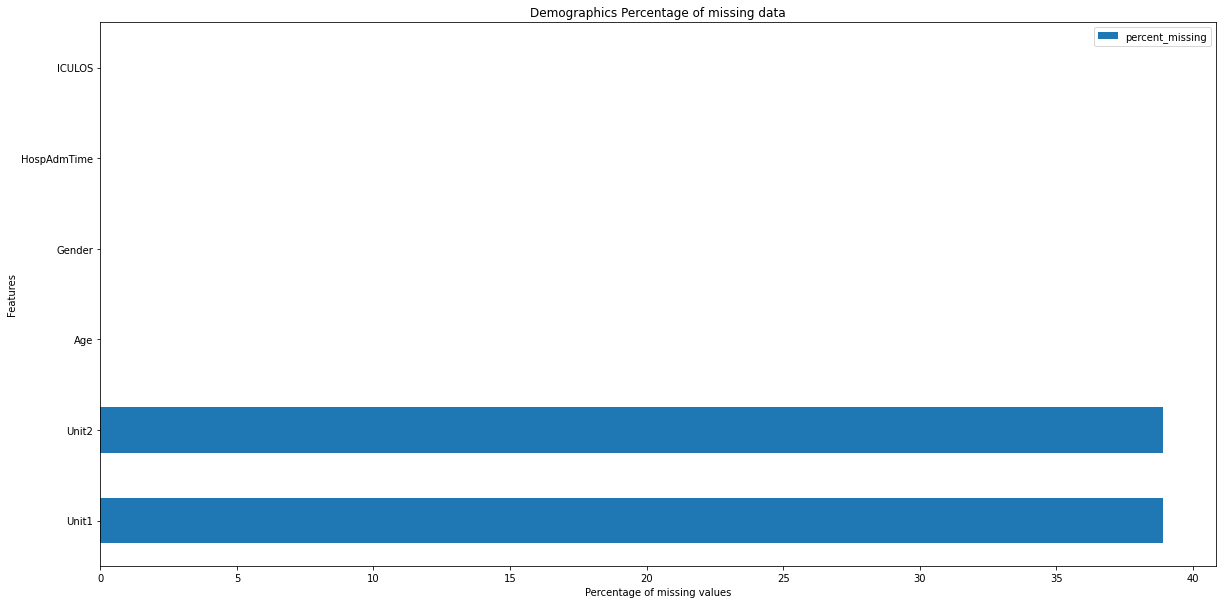

In [11]:
demogs_percent_missing = demogs_df.isnull().sum() * 100 / len(demogs_df)
demogs_missing_value_df = pd.DataFrame({'column_name': demogs_df.columns,
                                 'percent_missing': demogs_percent_missing})
demogs_missing_value_df.sort_values('percent_missing', inplace=True,ascending=False)
demogs_missing_value_df.plot.barh(figsize=(20,10))
plt.xlabel('Percentage of missing values')
plt.ylabel('Features')
plt.title(f'Demographics Percentage of missing data')
plt.show()

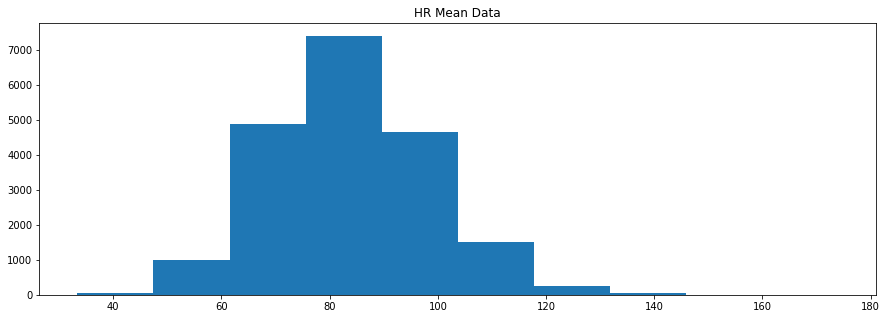

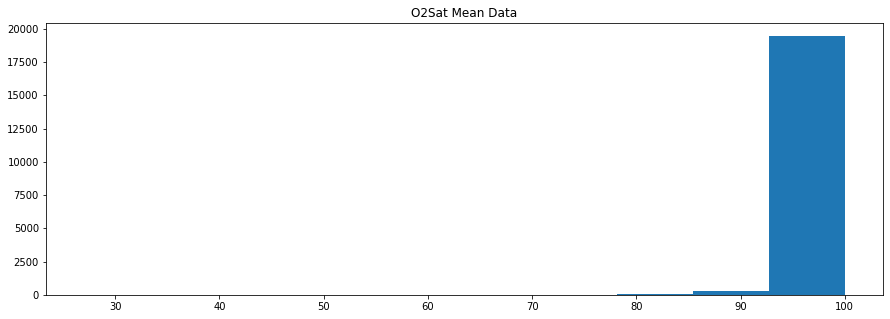

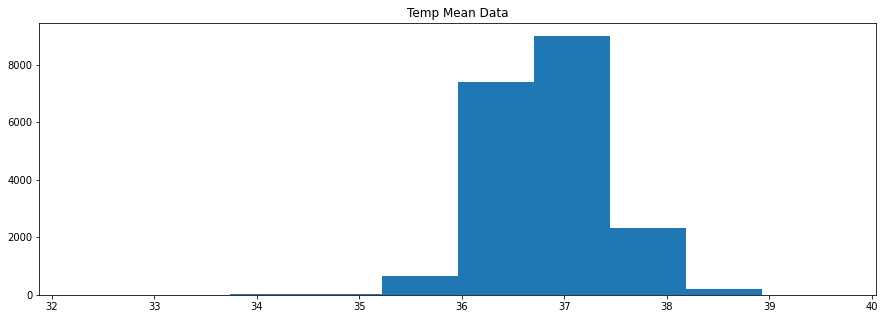

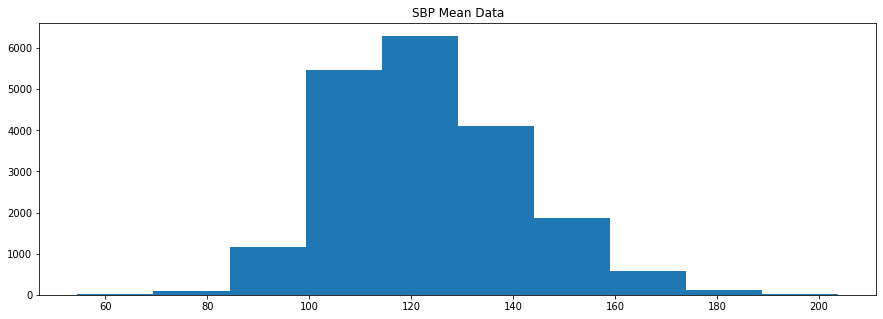

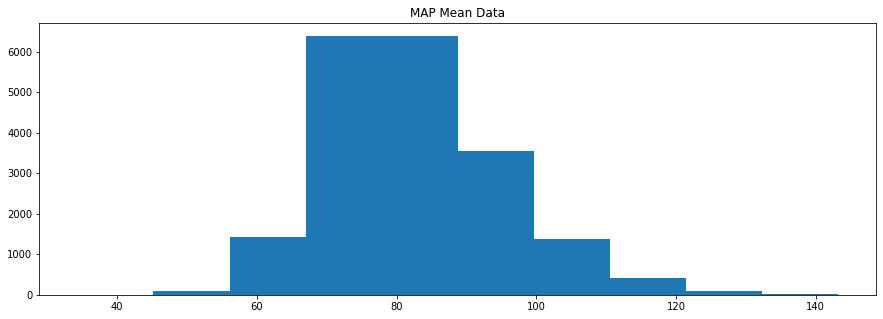

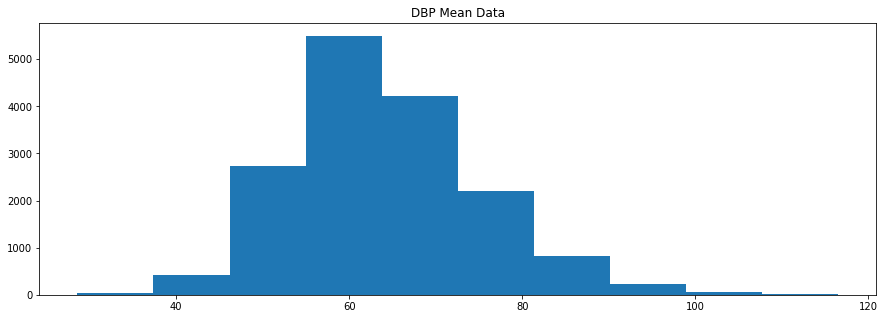

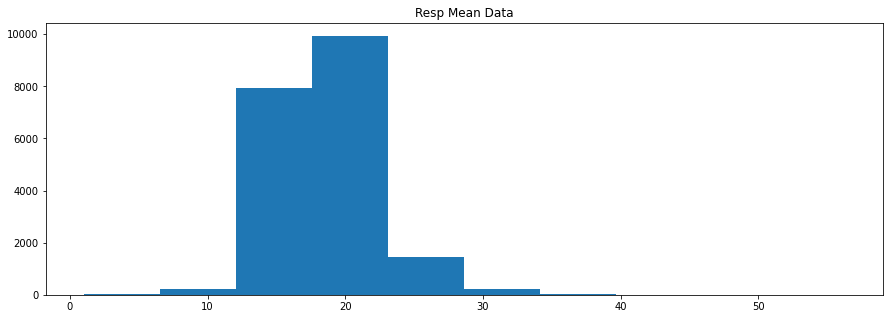

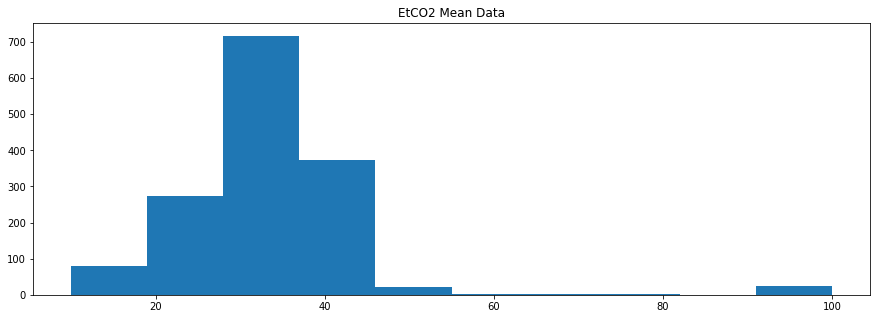

In [60]:
for vital in vitals:
    plt.hist(data_mean[vital].dropna())
    plt.title(f'{vital} Mean Data')
    plt.show()

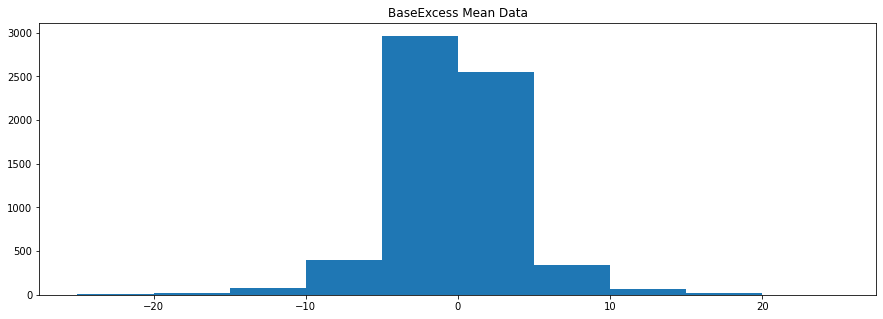

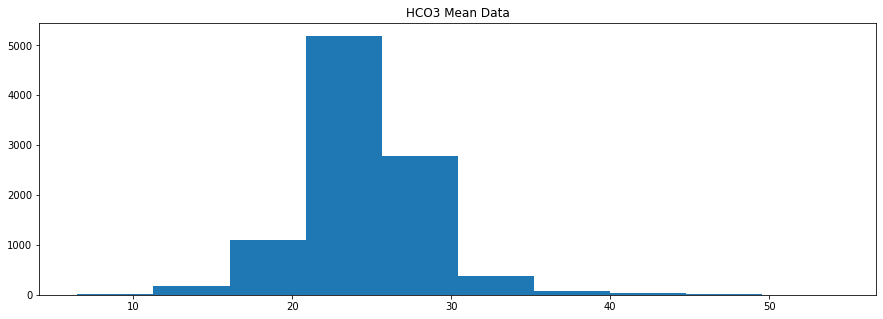

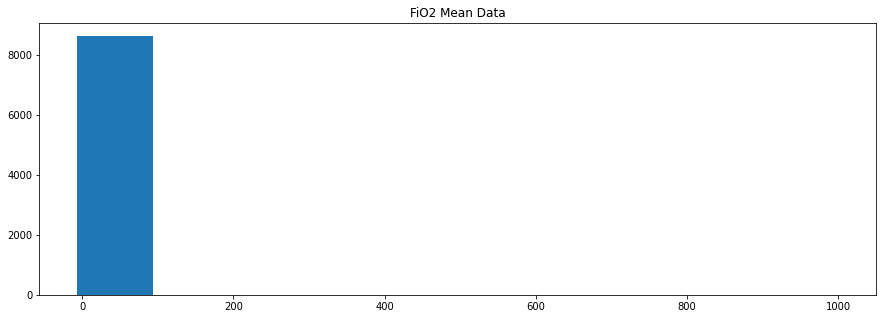

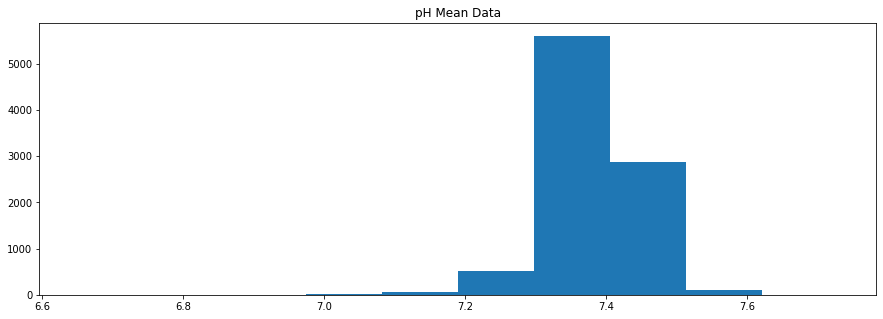

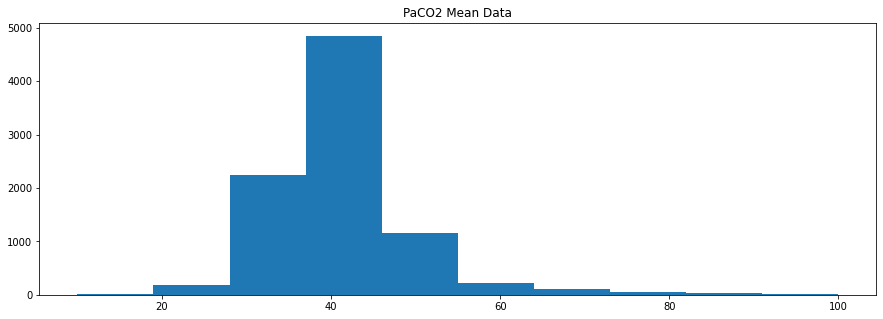

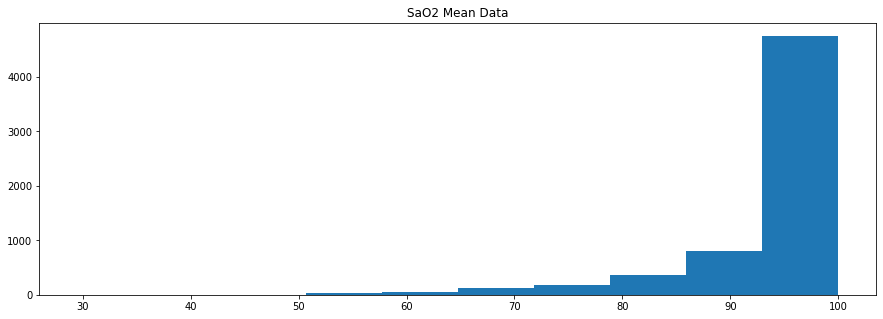

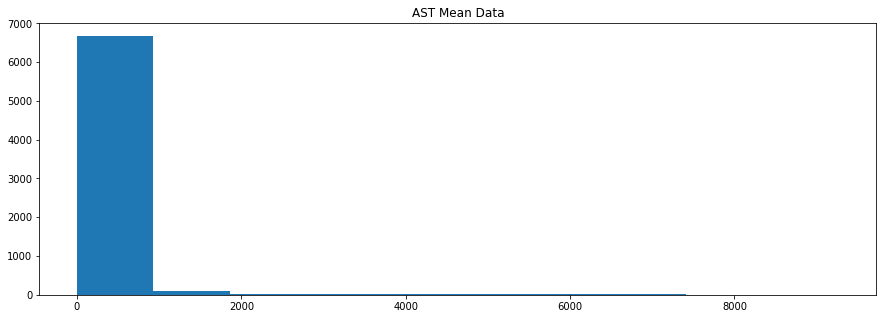

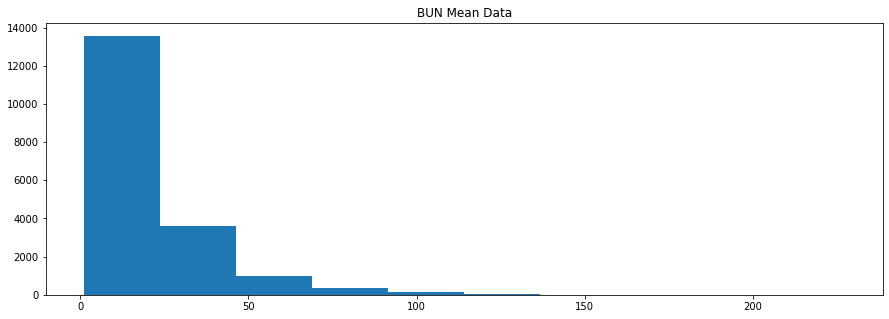

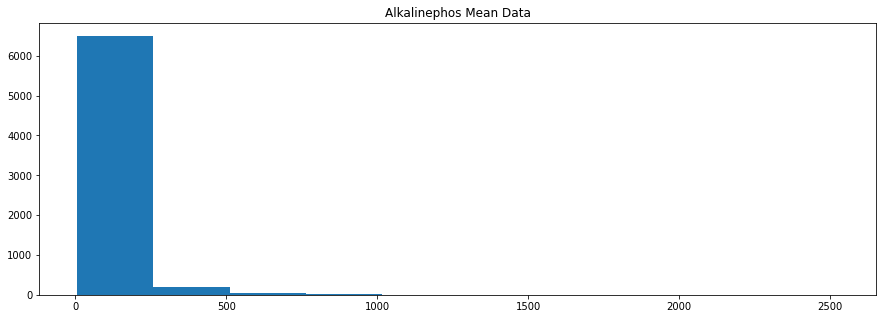

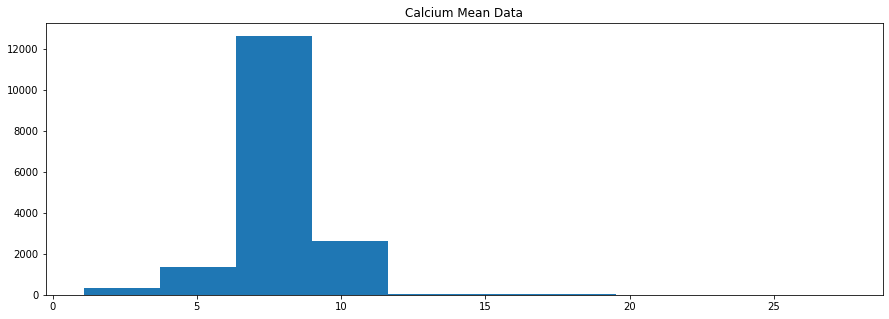

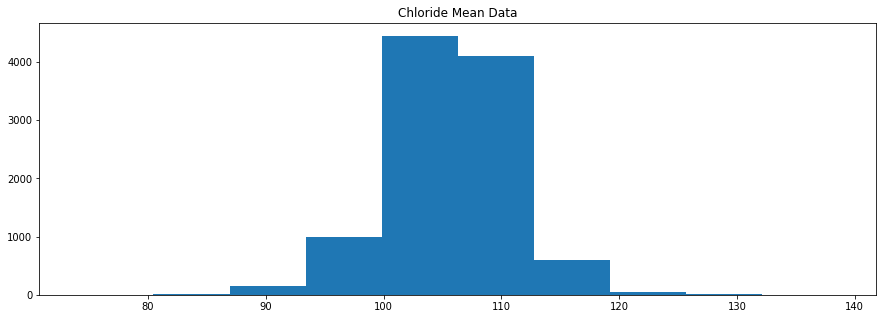

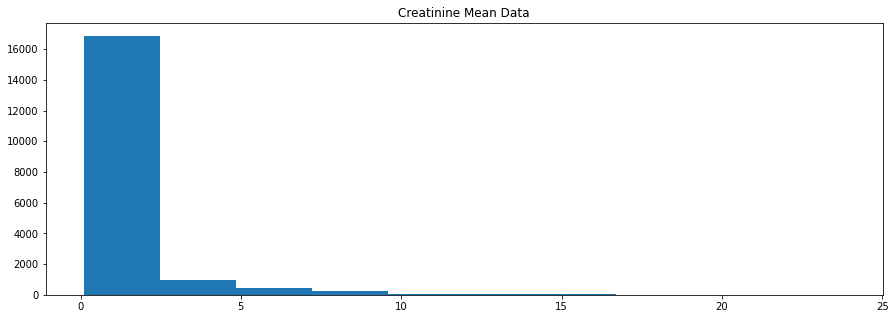

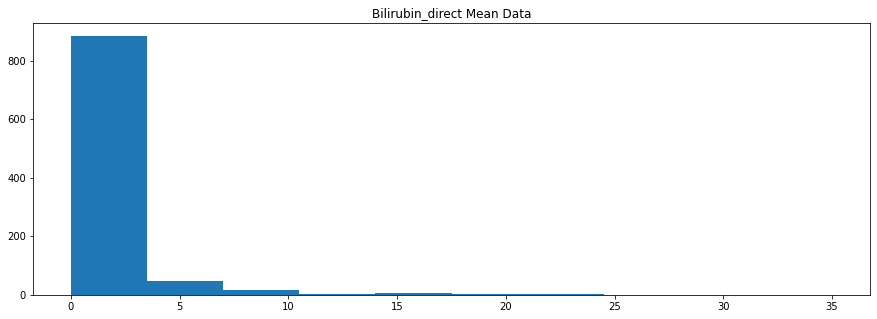

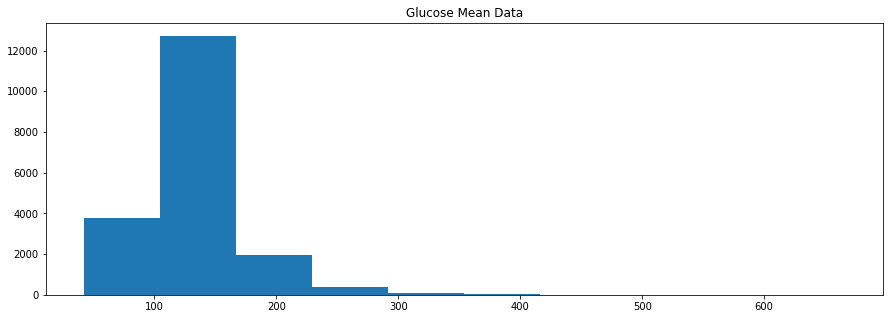

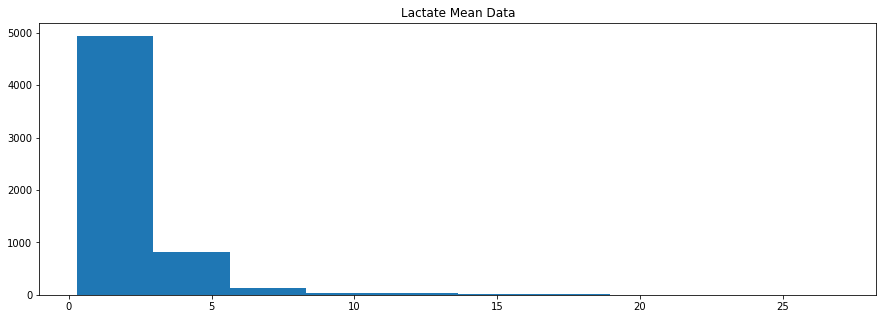

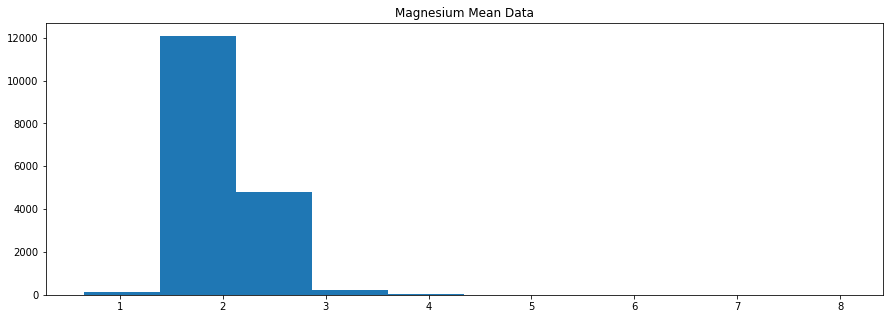

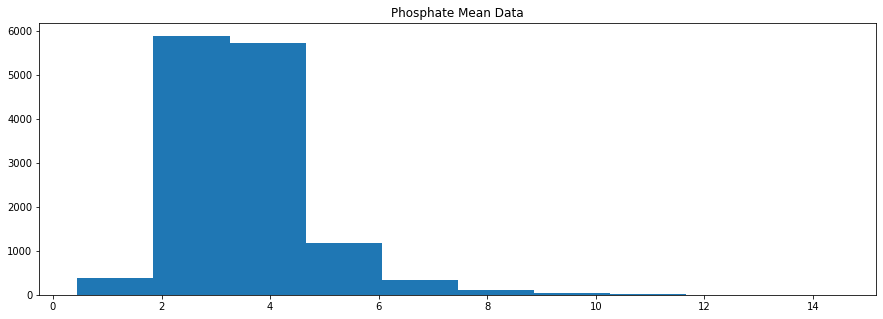

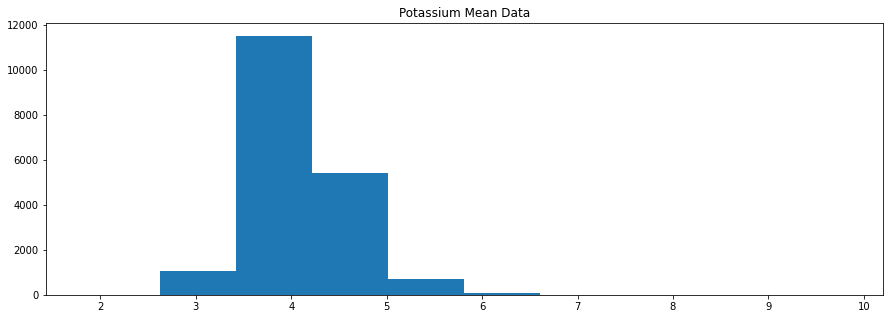

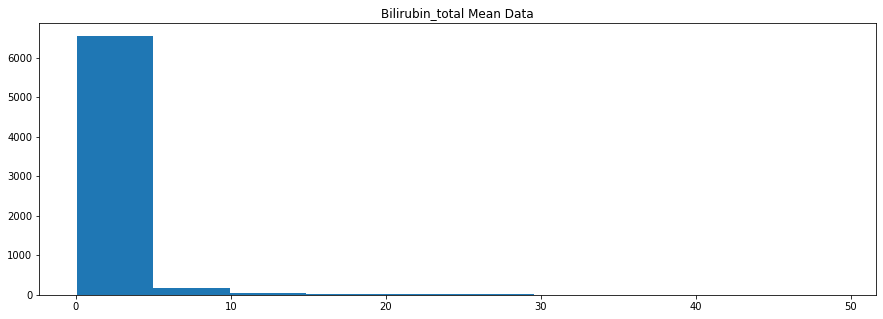

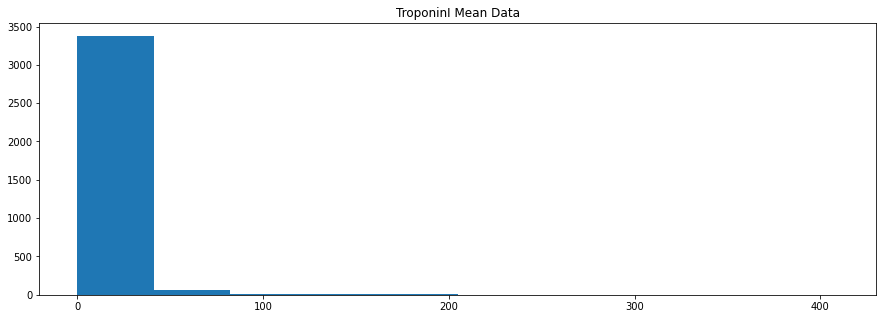

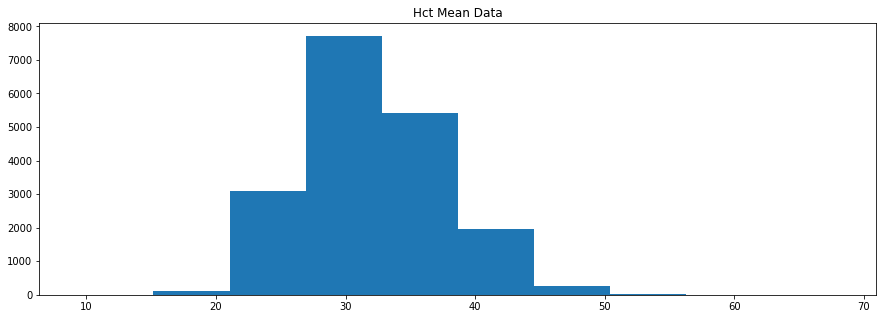

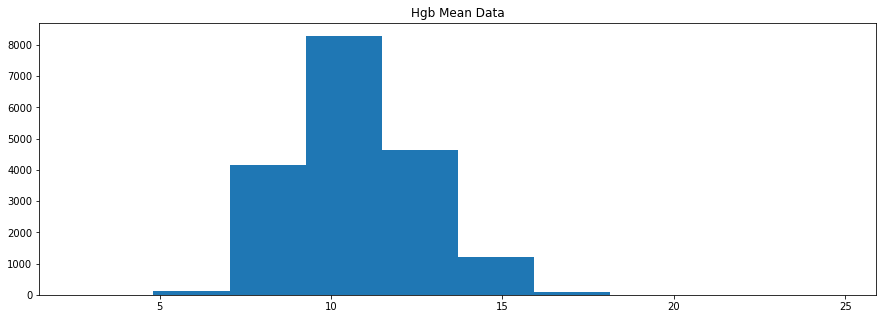

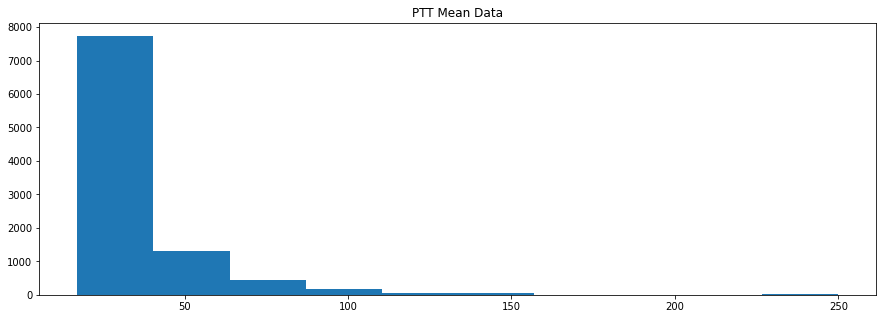

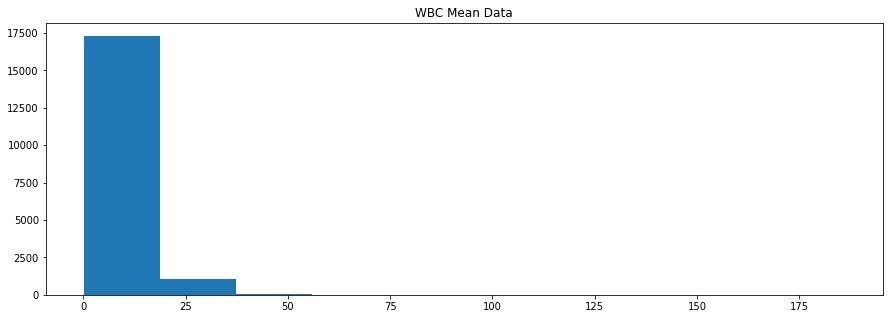

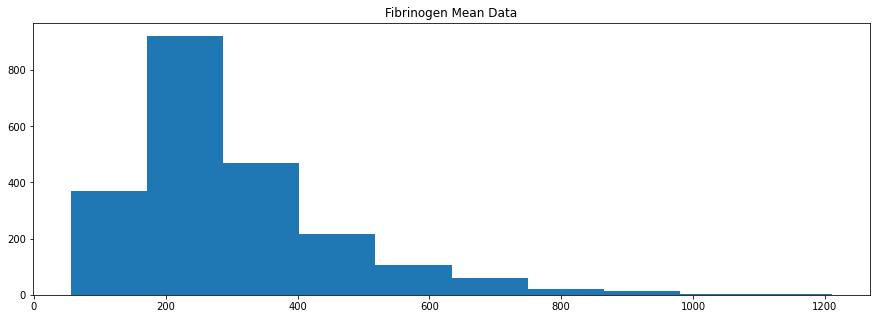

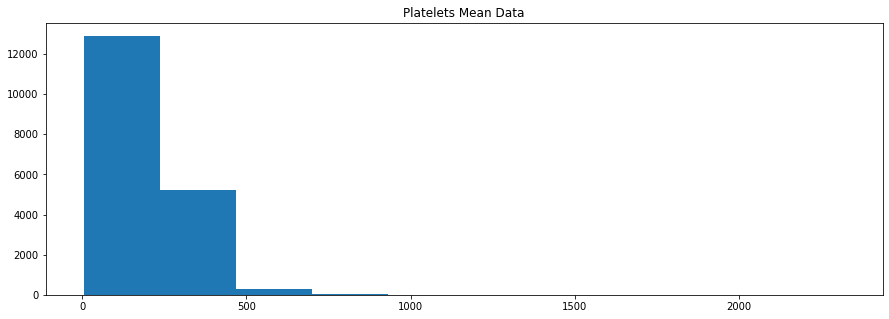

In [61]:
for lab in labs:
    plt.hist(data_mean[lab].dropna())
    plt.title(f'{lab} Mean Data')
    plt.show()

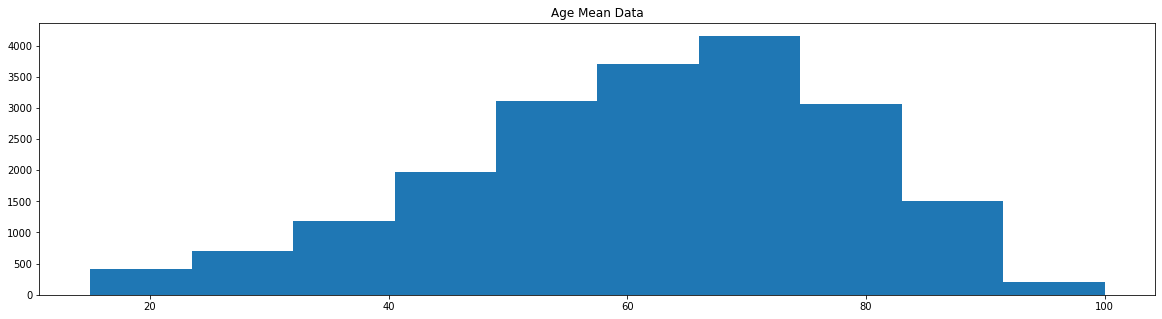

In [50]:
plt.hist(data_mean['Age'].dropna())
plt.title(f'Age Mean Data')    
plt.show()

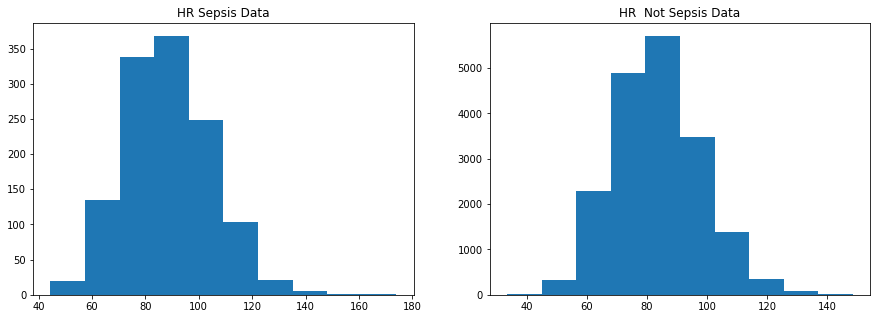

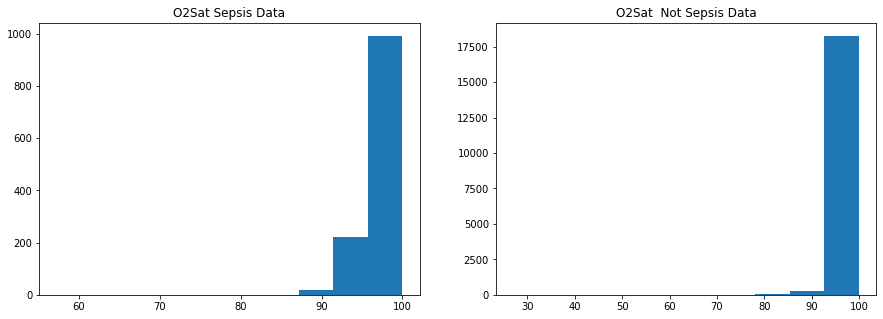

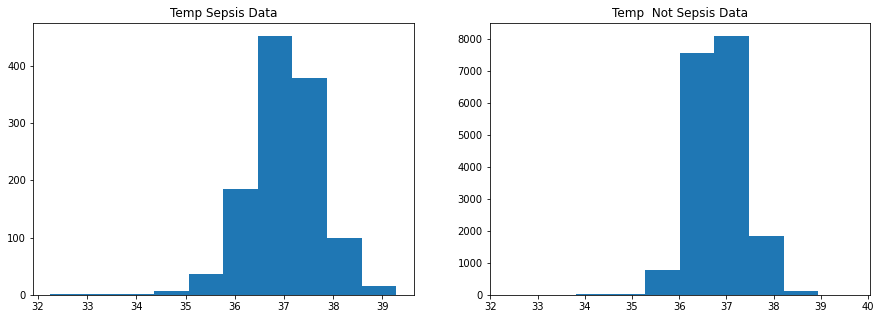

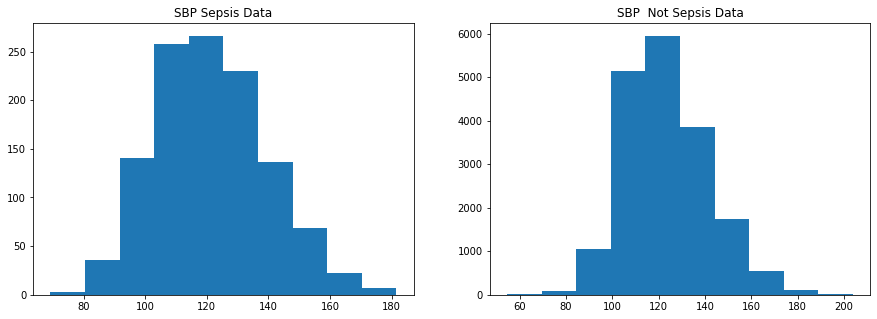

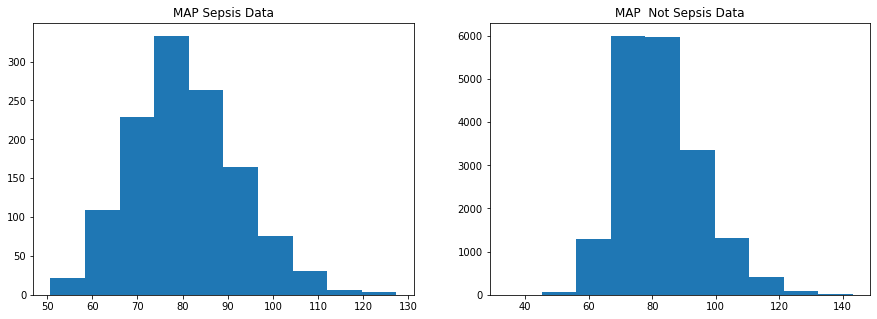

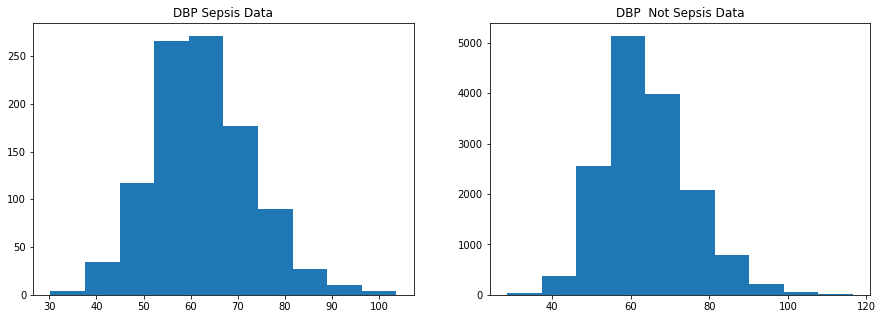

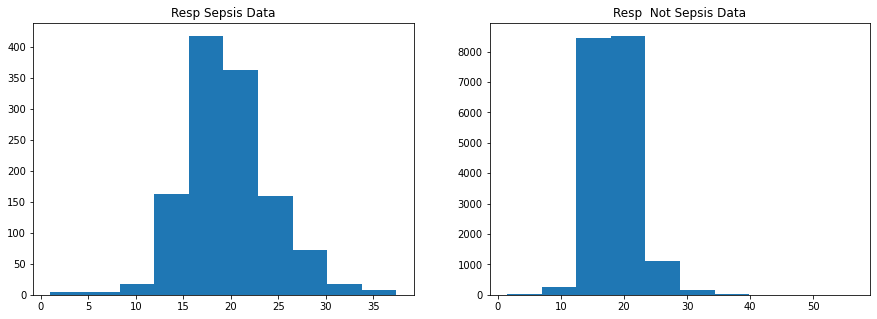

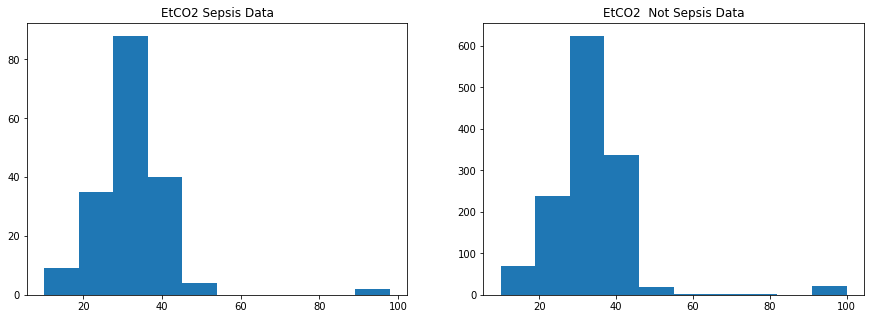

In [52]:
plt.rcParams["figure.figsize"] = (15,5)

for vital in vitals:
    plt.subplot(1, 2, 1)
    plt.hist(data_sepsis_mean[vital].dropna())
    plt.title(f'{vital} Sepsis Data')

    plt.subplot(1, 2, 2)
    plt.hist(data_not_sepsis_mean[vital].dropna())
    plt.title(f'{vital}  Not Sepsis Data')
    
    plt.show()

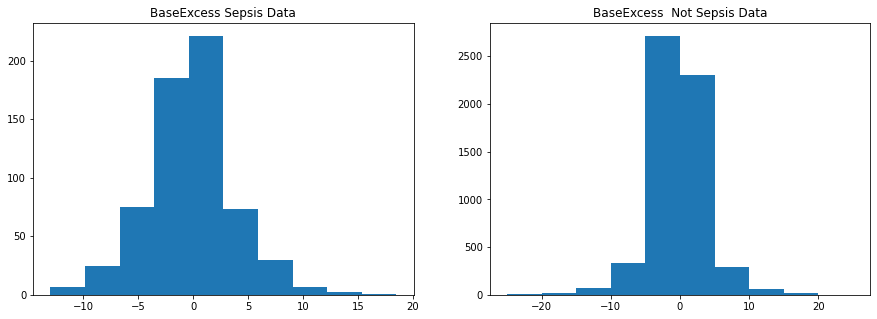

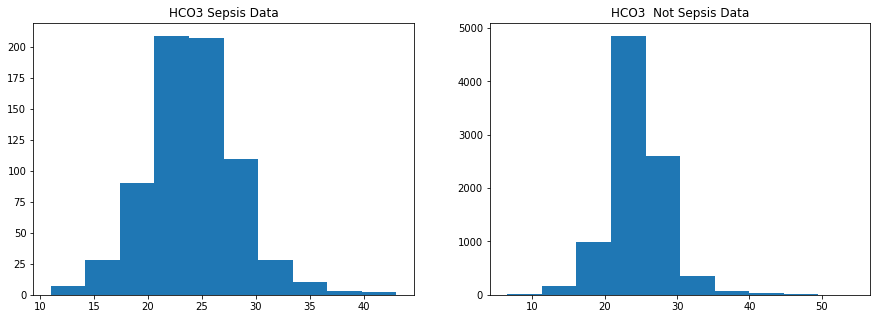

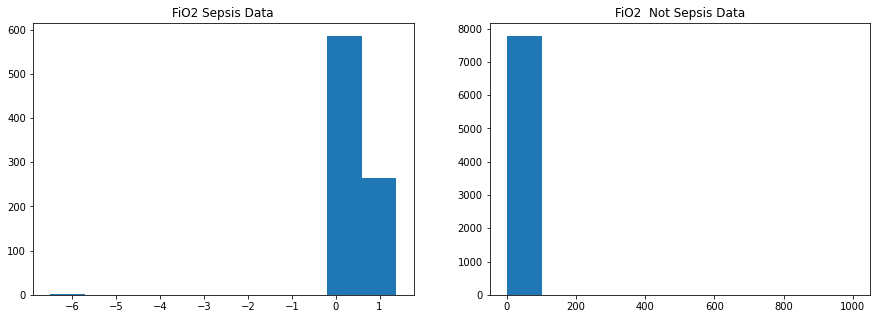

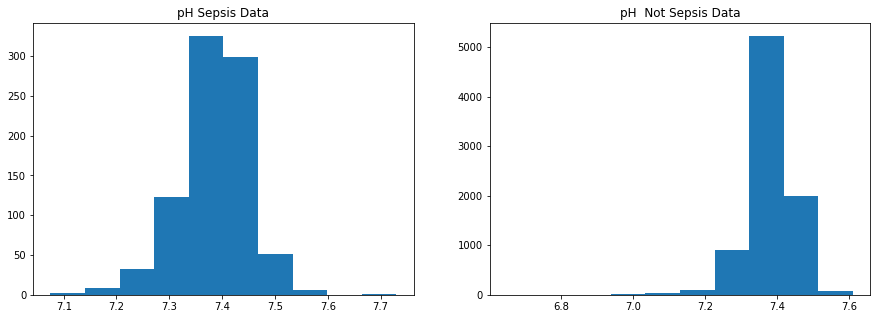

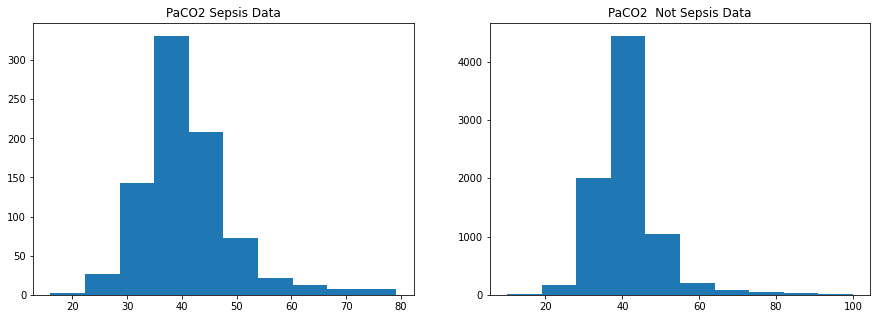

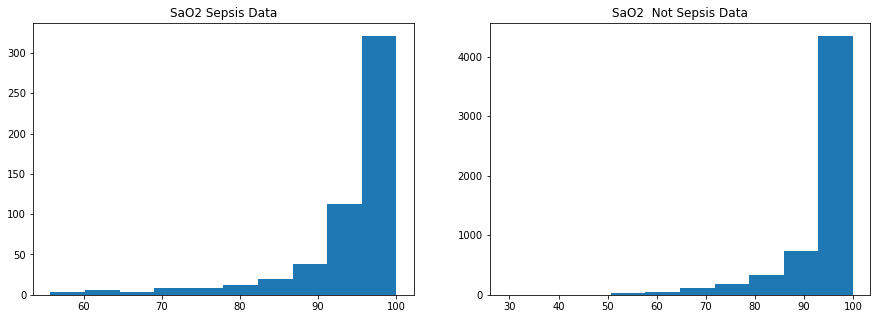

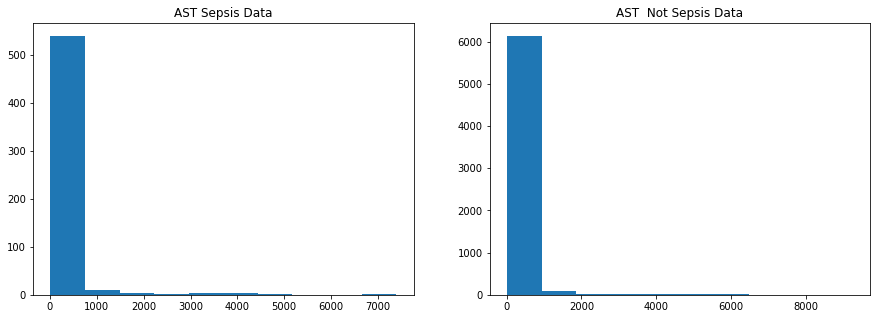

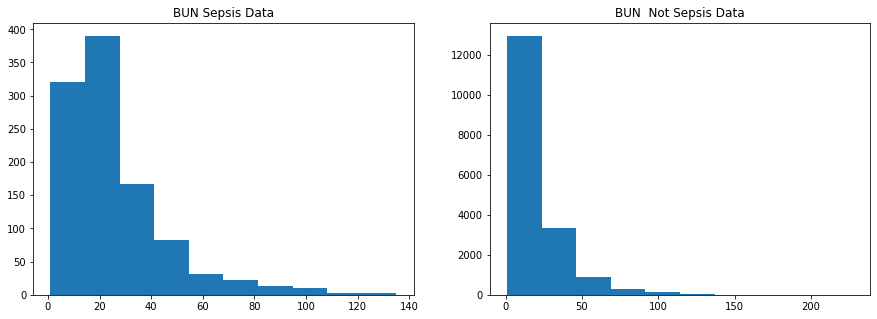

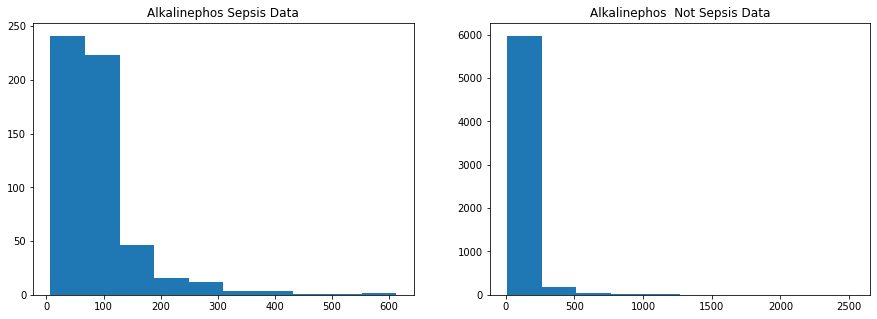

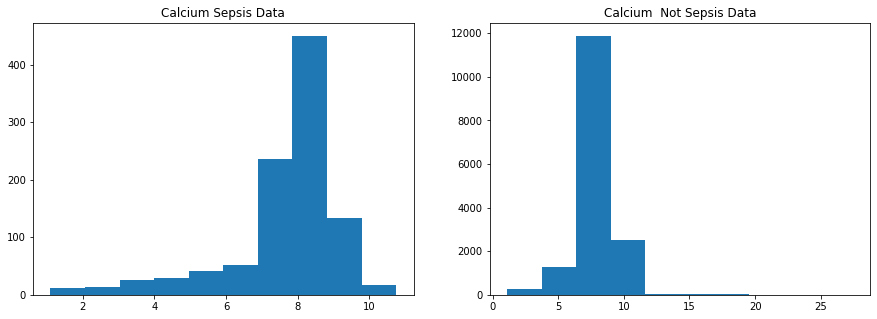

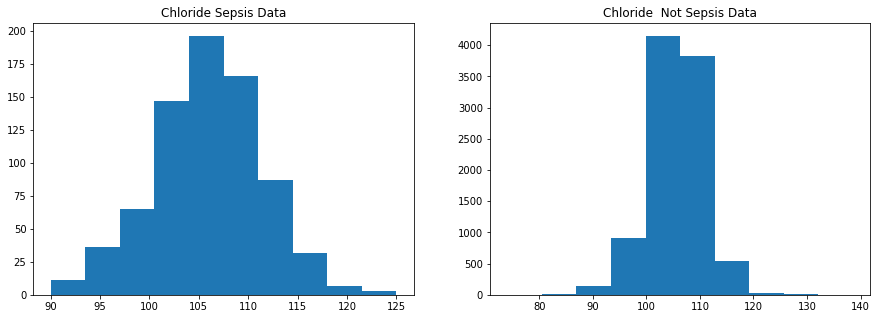

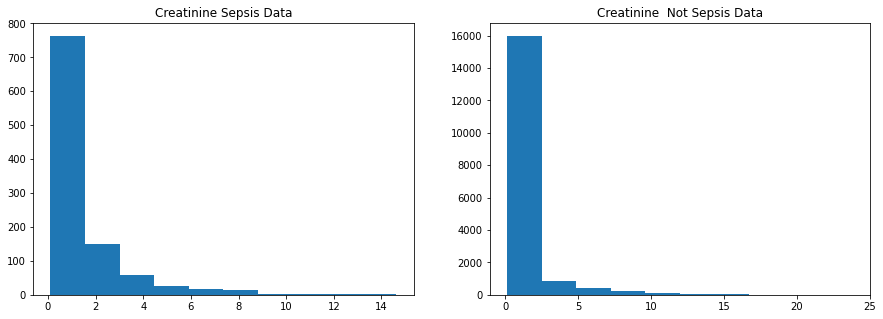

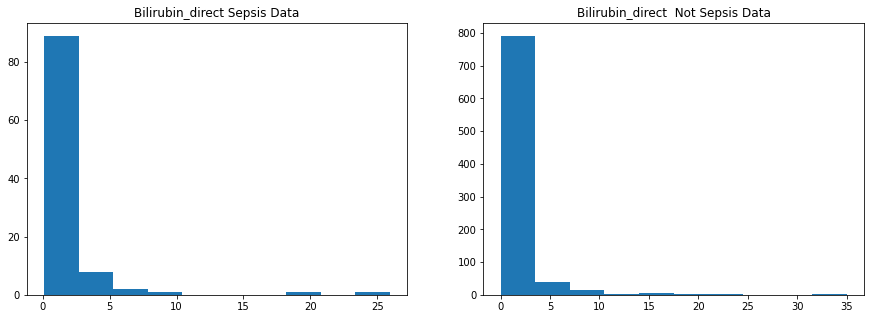

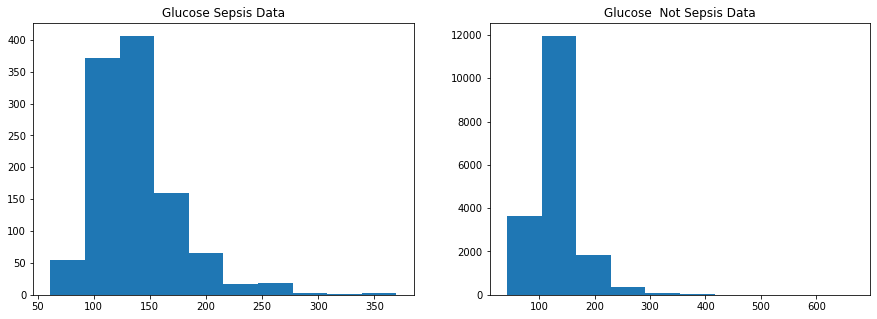

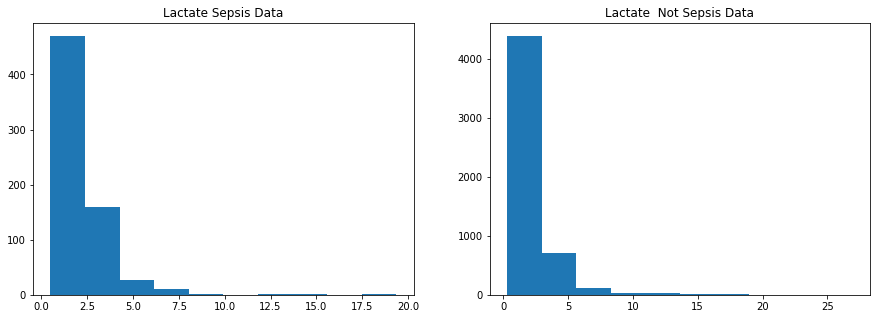

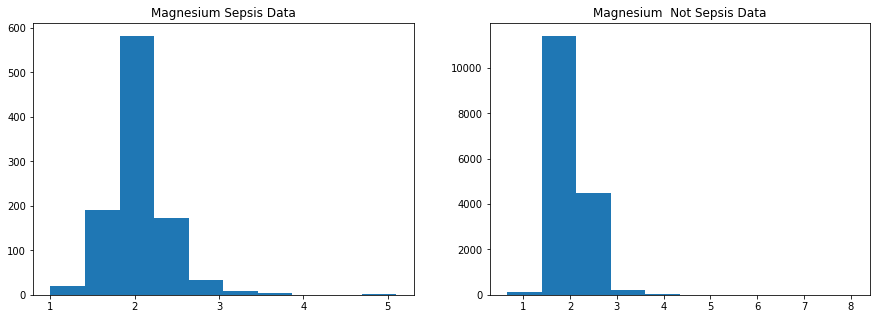

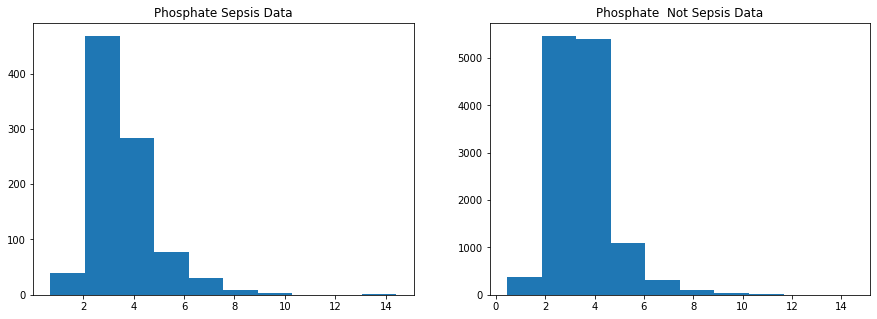

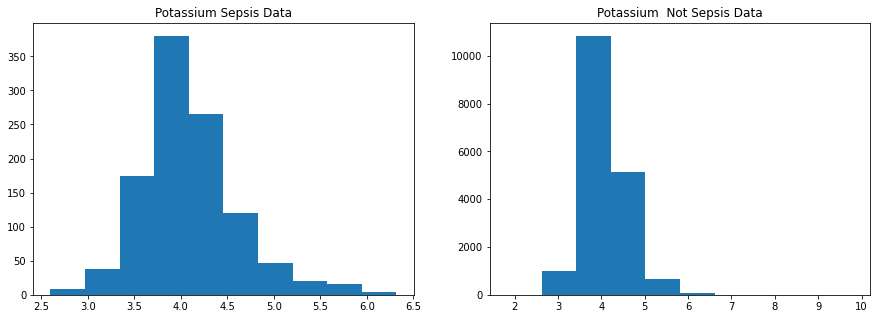

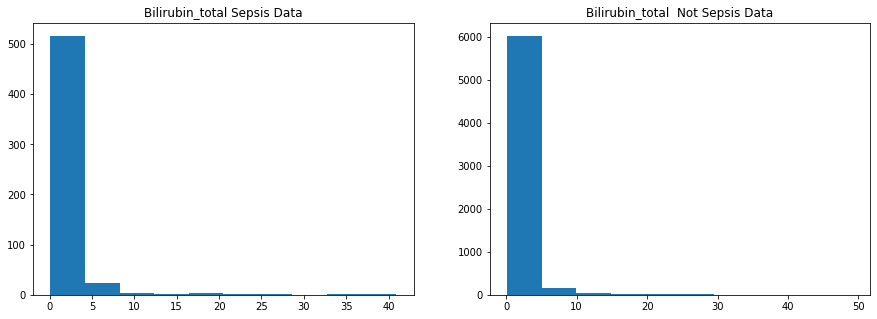

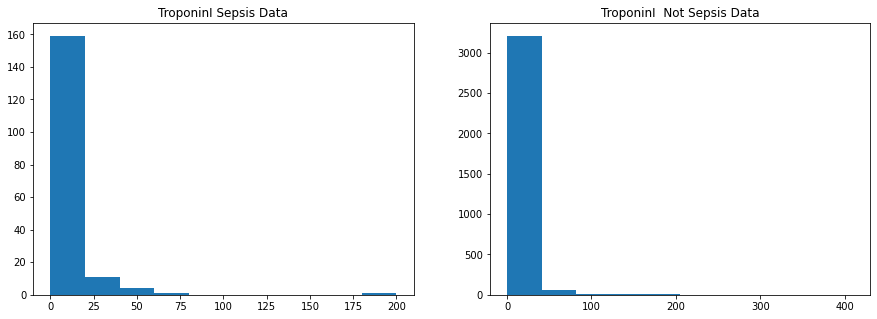

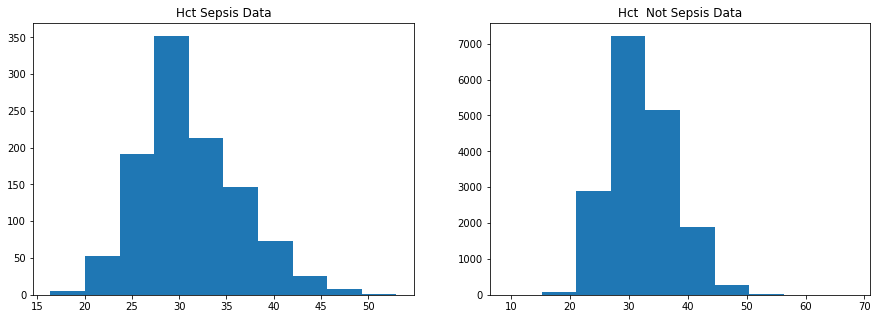

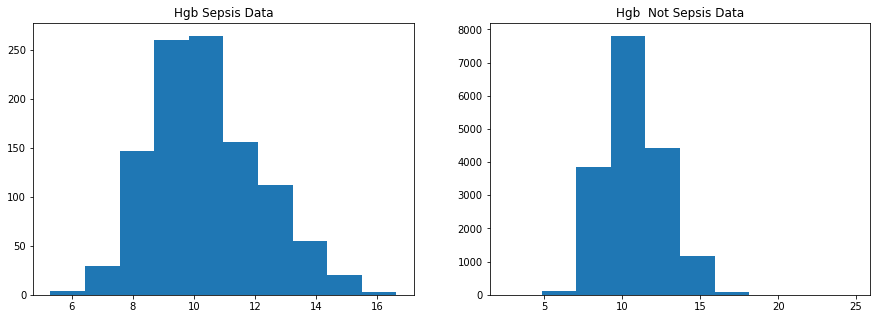

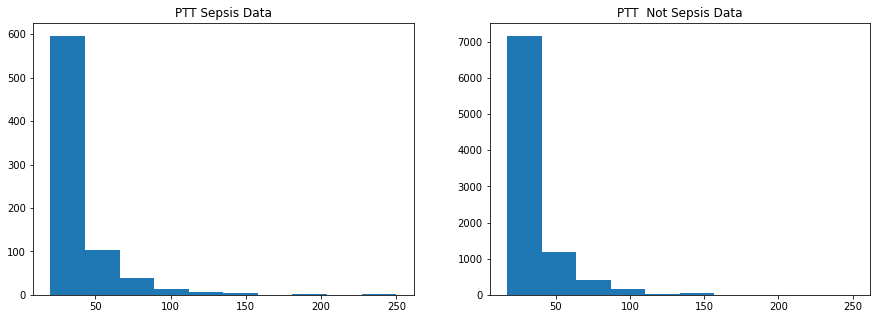

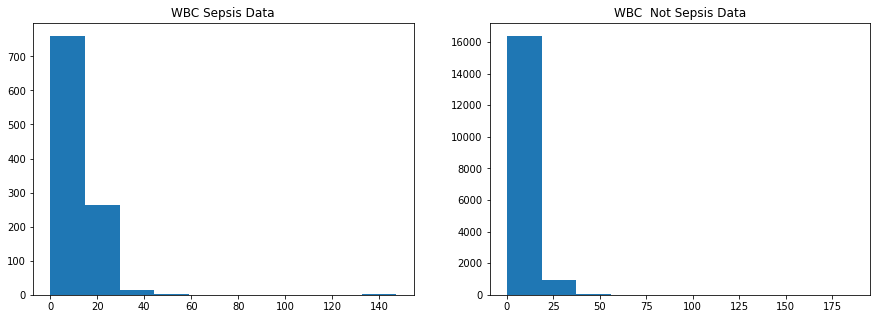

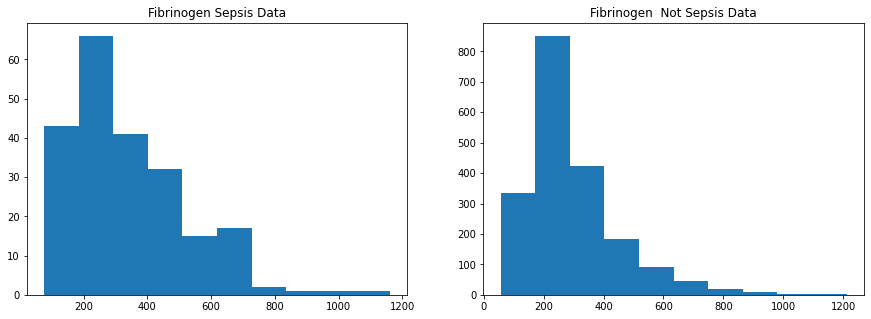

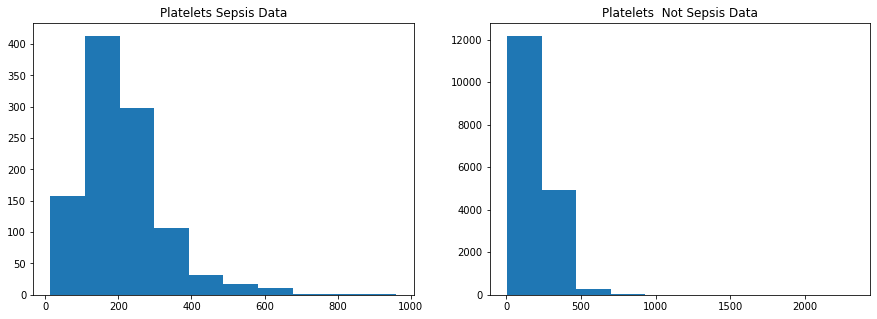

In [53]:
for lab in labs:
    plt.subplot(1, 2, 1)
    plt.hist(data_sepsis_mean[lab].dropna())
    plt.title(f'{lab} Sepsis Data')

    plt.subplot(1, 2, 2)
    plt.hist(data_not_sepsis_mean[lab].dropna())
    plt.title(f'{lab}  Not Sepsis Data')
    
    plt.show()

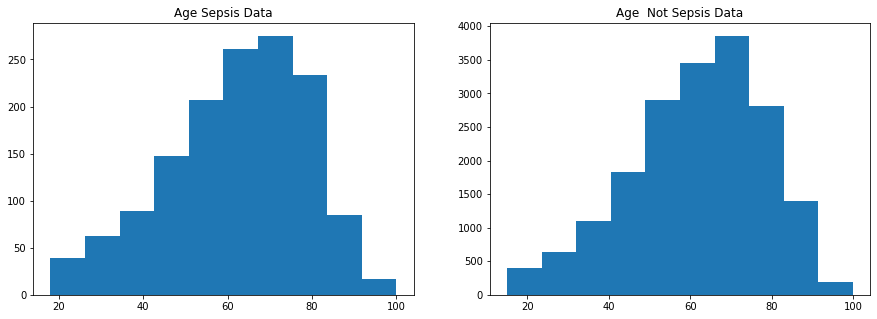

In [56]:
plt.subplot(1, 2, 1)
plt.hist(data_sepsis_mean['Age'].dropna())
plt.title(f'Age Sepsis Data')

plt.subplot(1, 2, 2)
plt.hist(data_not_sepsis_mean['Age'].dropna())
plt.title(f'Age  Not Sepsis Data')

plt.show()

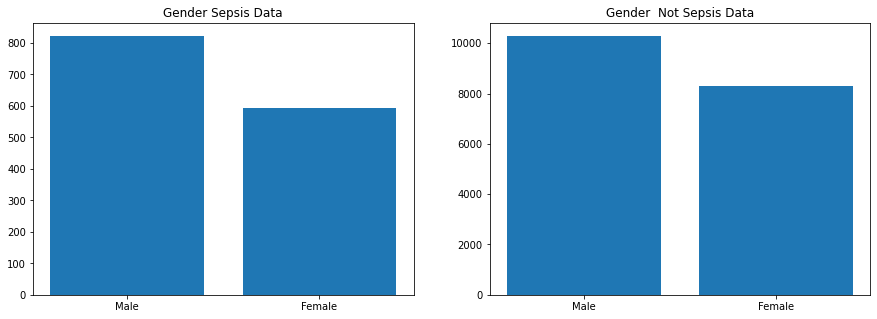

In [57]:
plt.subplot(1, 2, 1)
plt.bar(['Male', 'Female'], list(data_sepsis_mean['Gender'].value_counts()))
plt.title(f'Gender Sepsis Data')

plt.subplot(1, 2, 2)
plt.bar(['Male', 'Female'], list(data_not_sepsis_mean['Gender'].value_counts()))
plt.title(f'Gender  Not Sepsis Data')

plt.show()

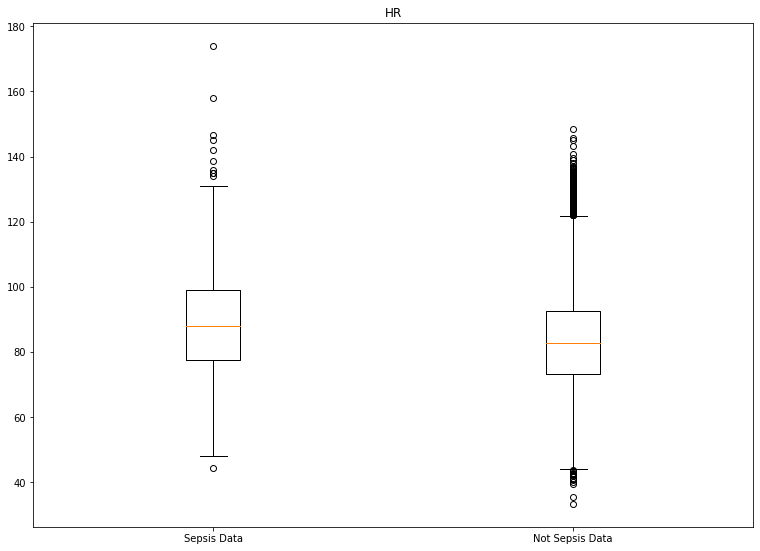

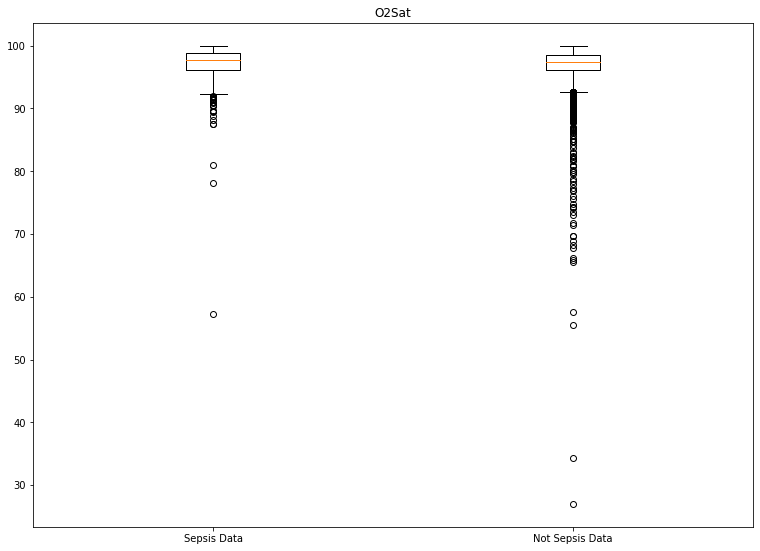

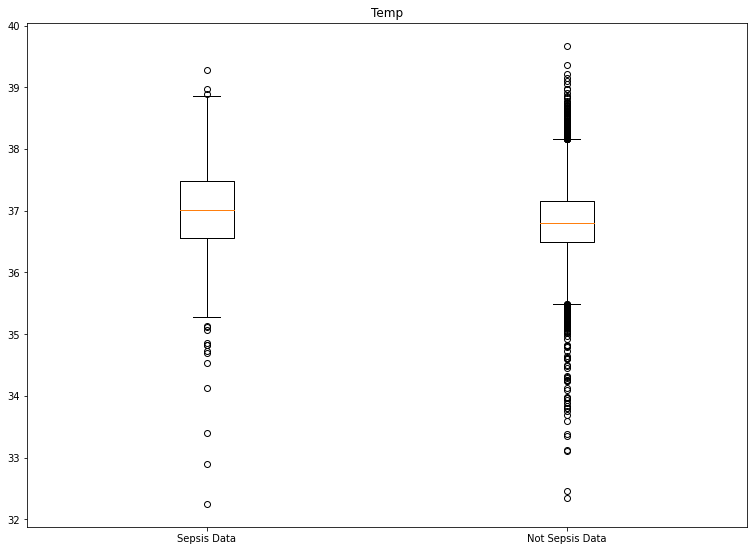

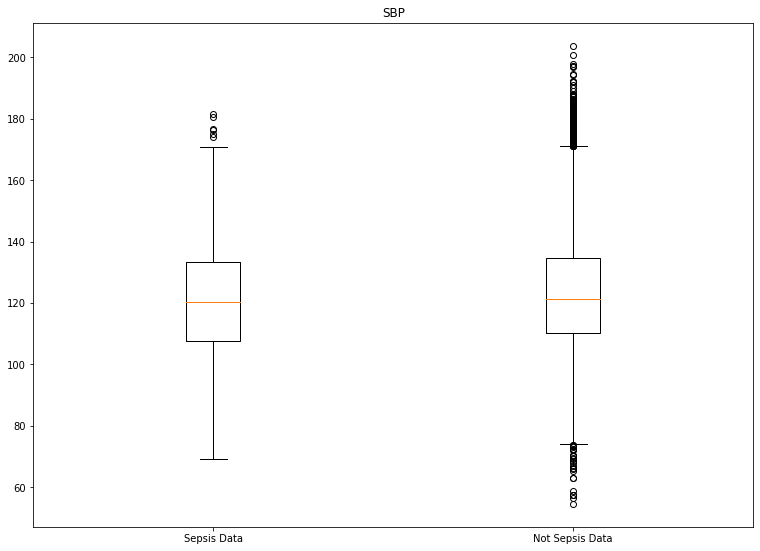

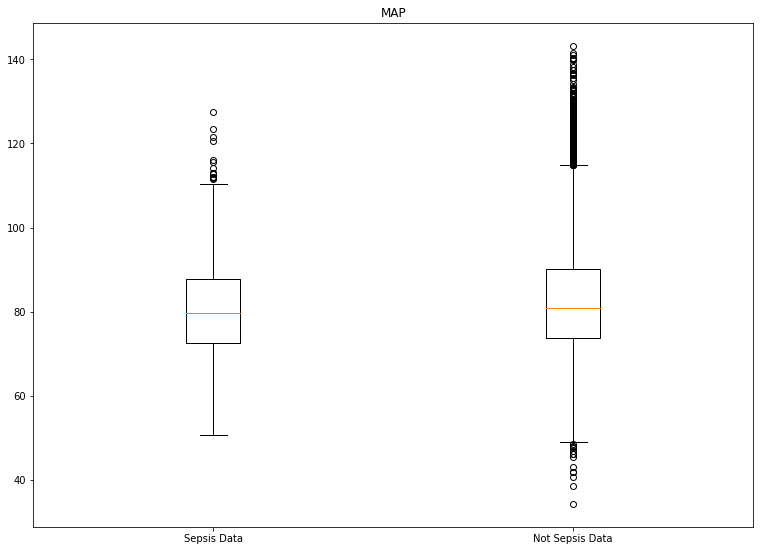

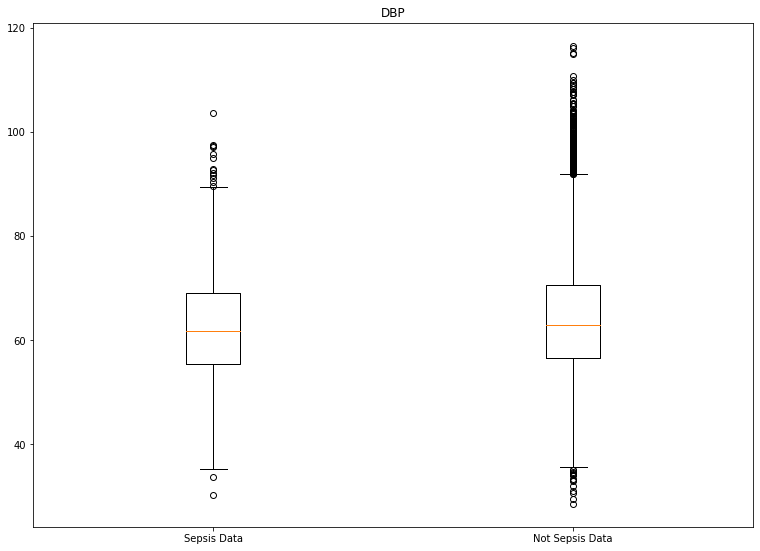

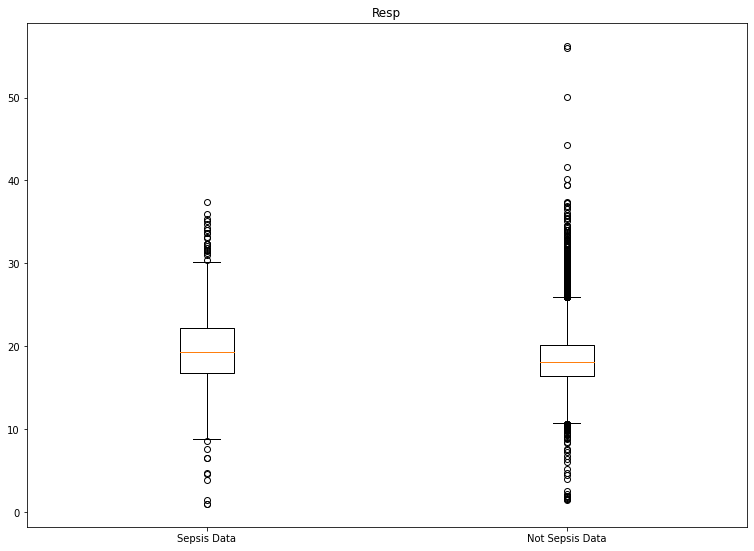

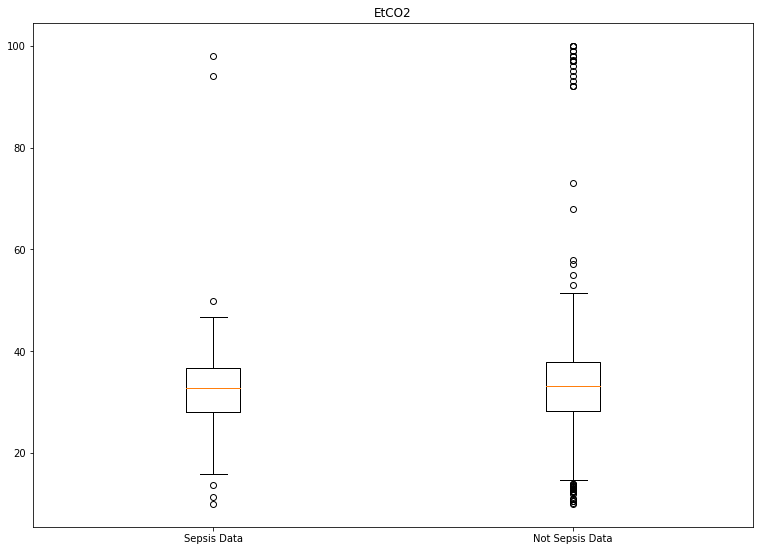

In [54]:
for vital in vitals:
    fig = plt.figure(figsize =(10, 7))

    # Creating axes instance
    ax = fig.add_axes([0, 0, 1, 1])

    # Creating plot
    bp = ax.boxplot([np.array(data_sepsis_mean[vital].dropna()), np.array(data_not_sepsis_mean[vital].dropna())])

    # show plot
    ax.set_xticklabels(['Sepsis Data', 'Not Sepsis Data'])
    ax.get_xaxis().tick_bottom()
    plt.title(vital)
    plt.show()

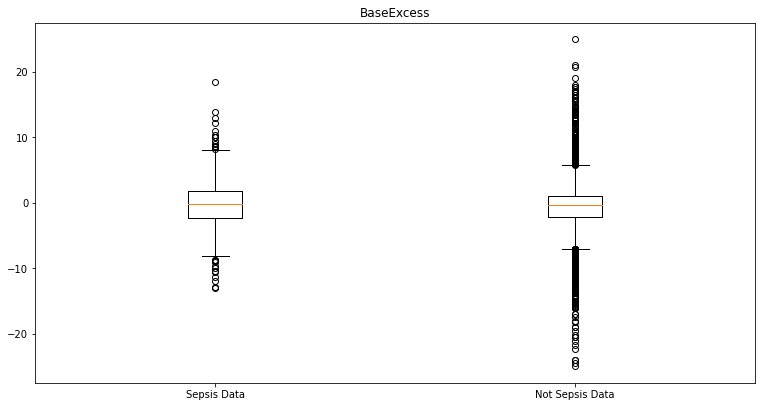

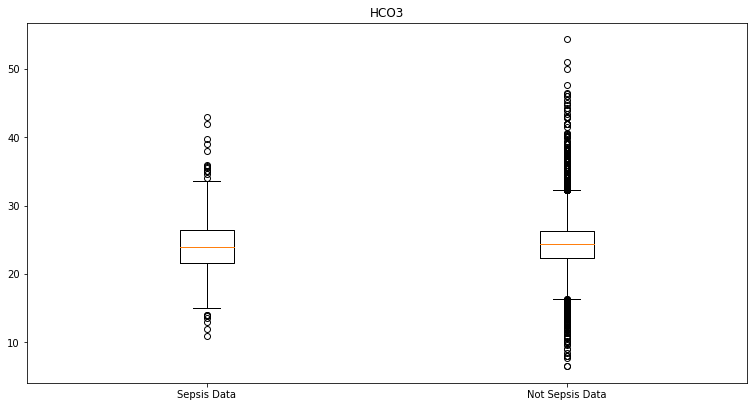

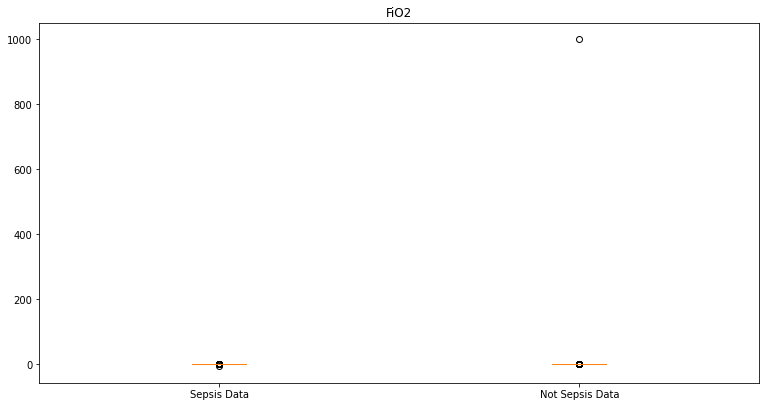

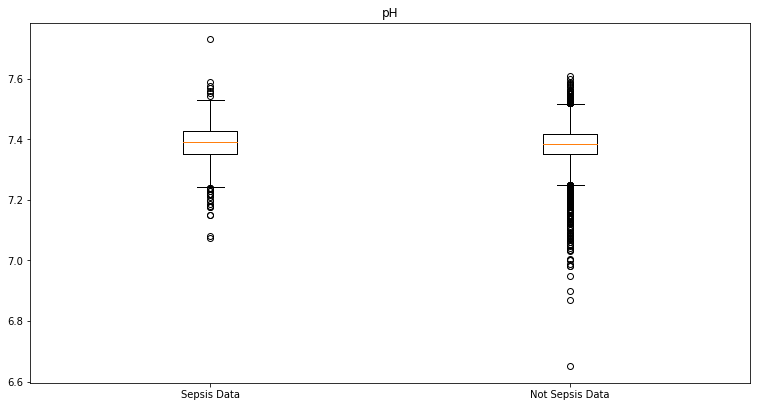

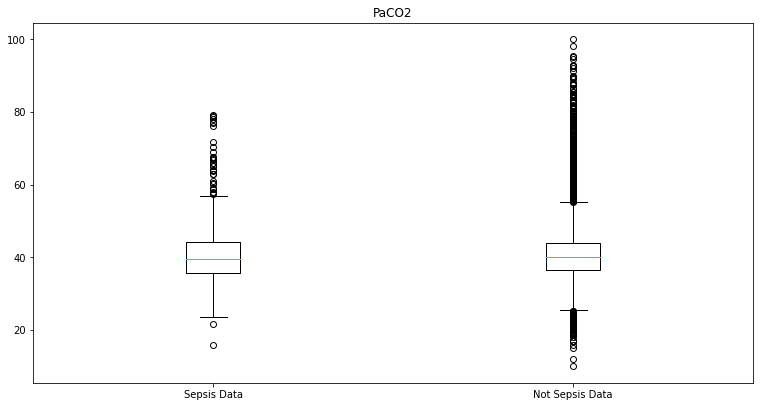

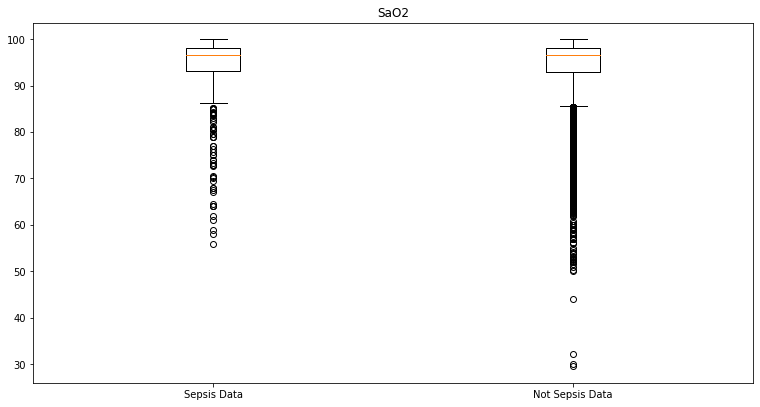

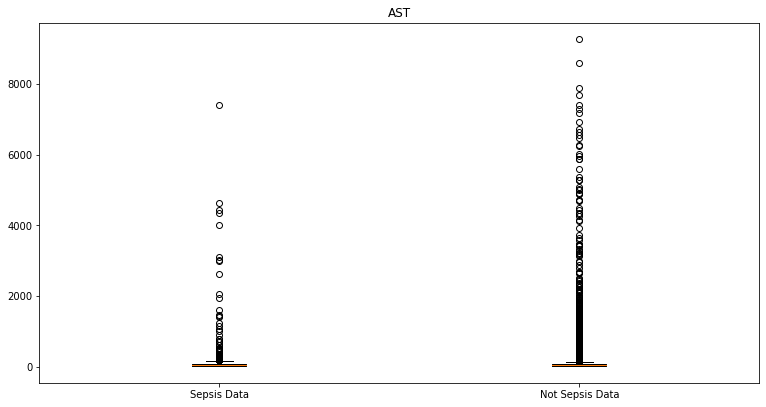

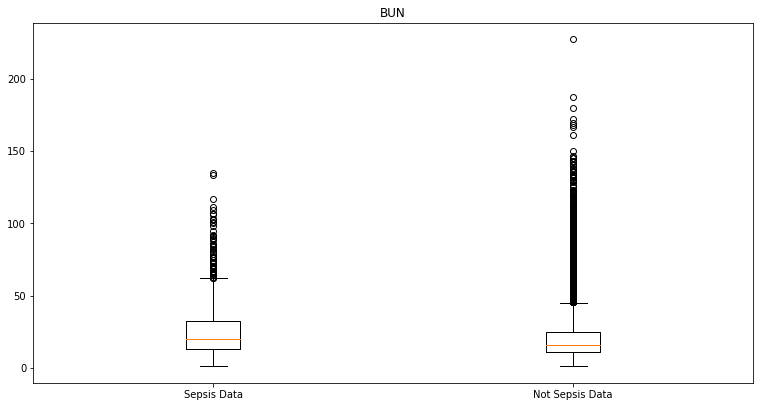

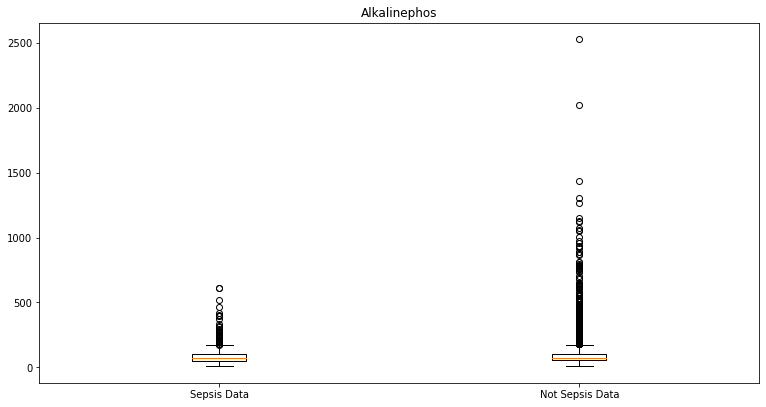

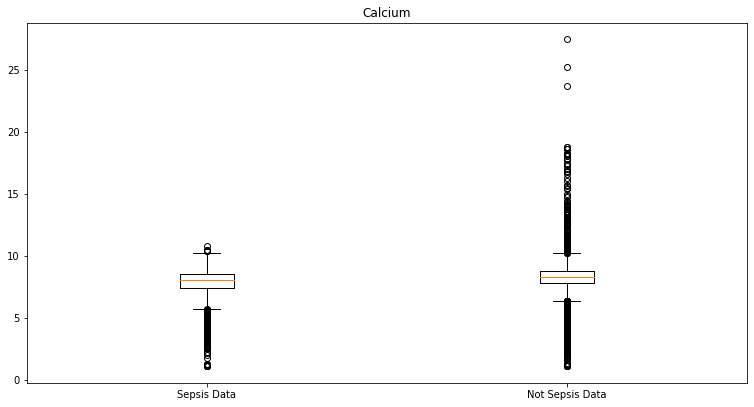

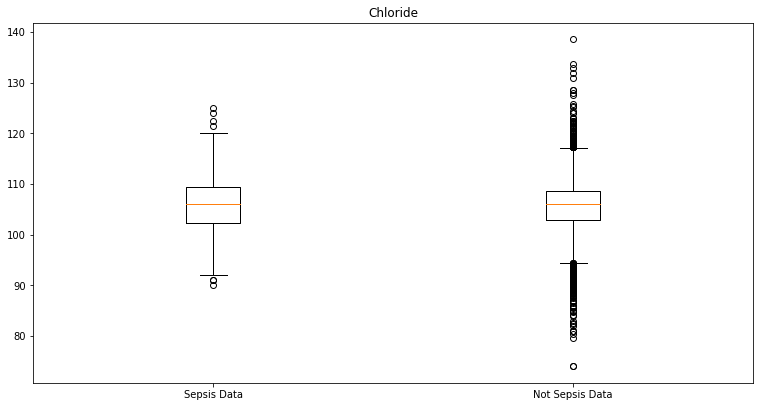

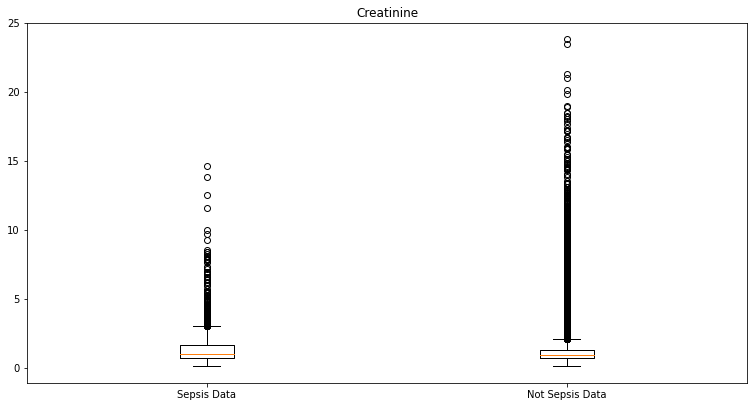

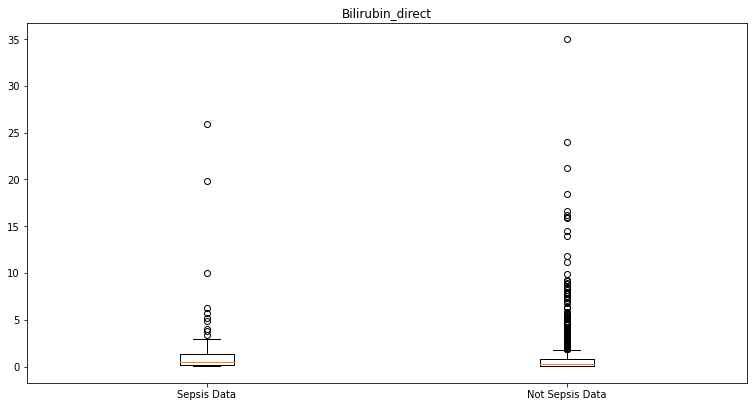

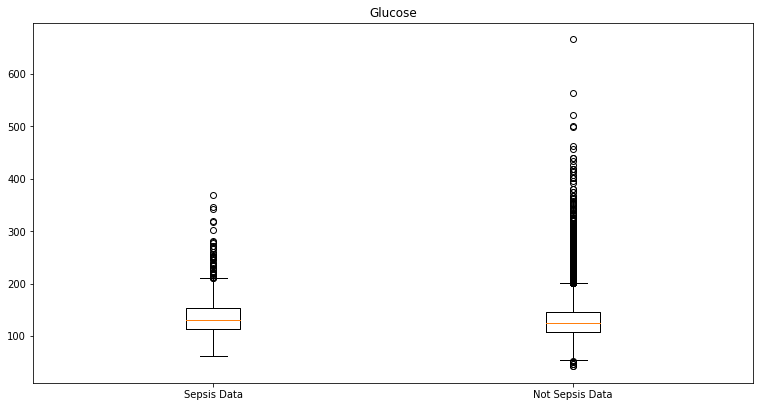

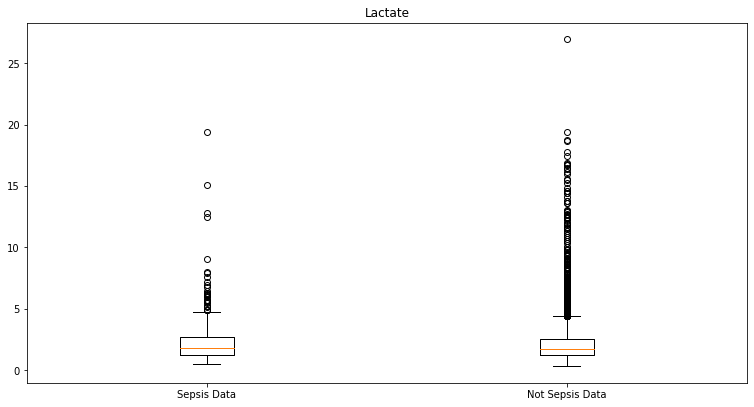

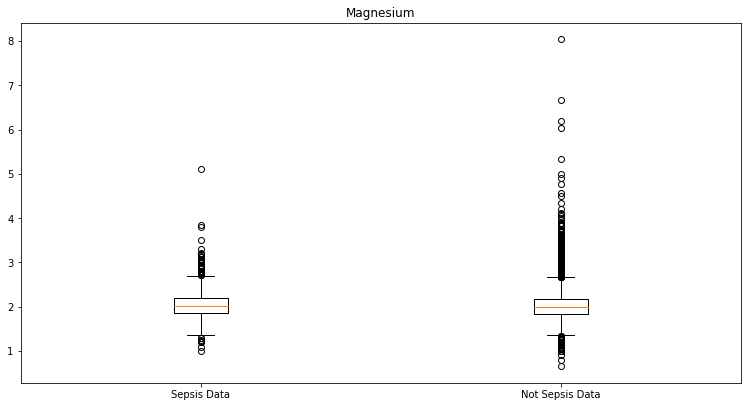

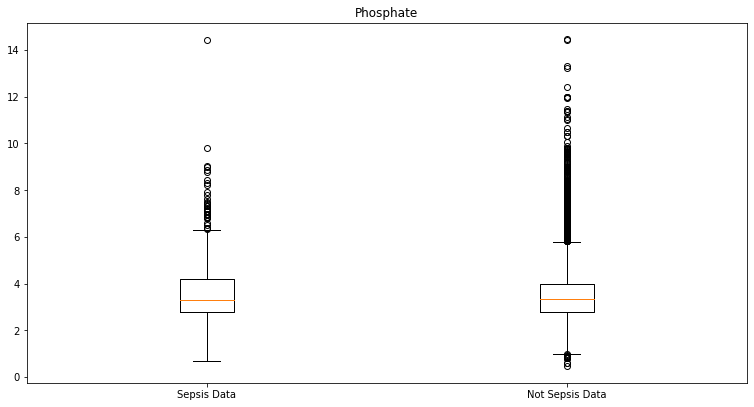

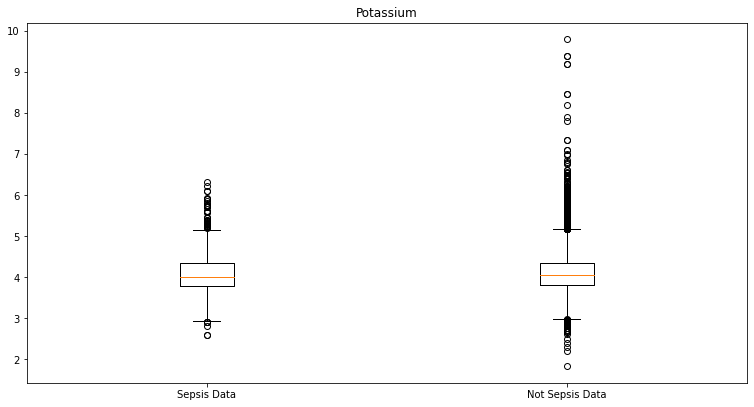

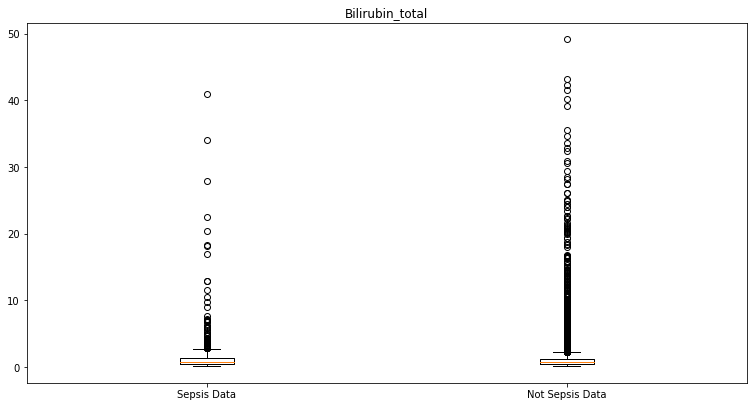

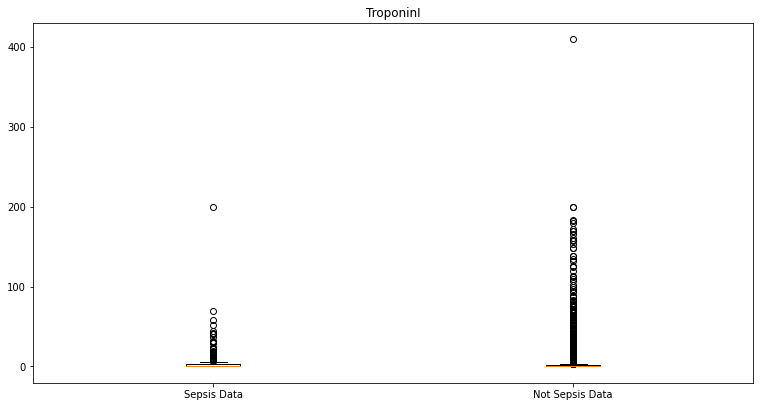

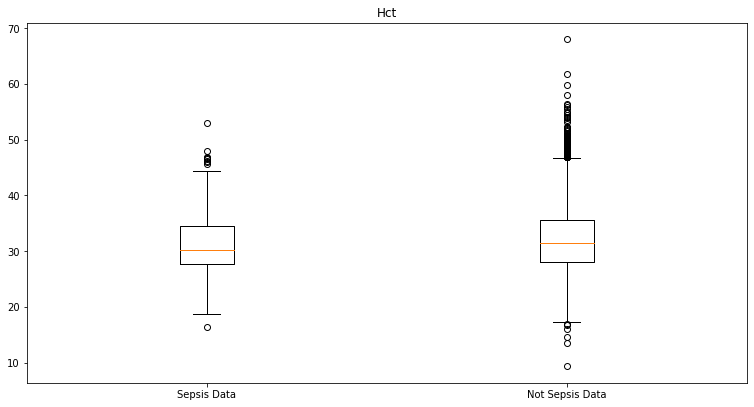

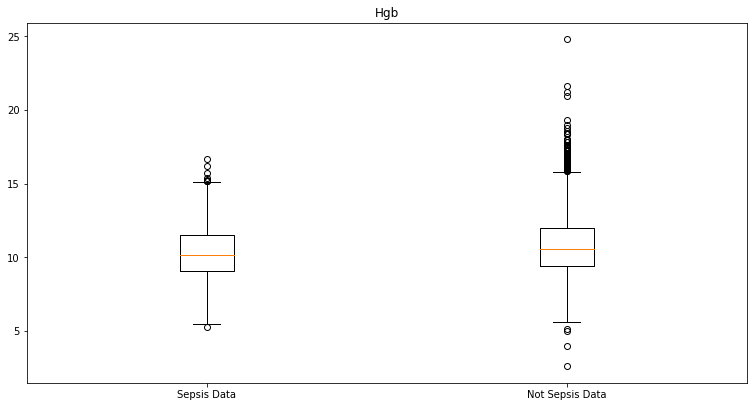

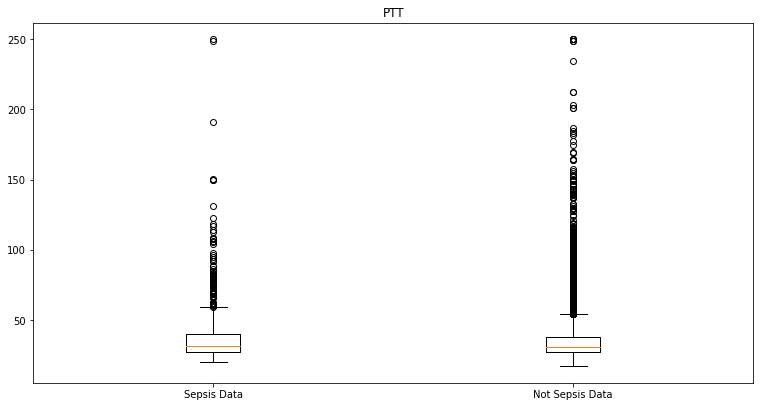

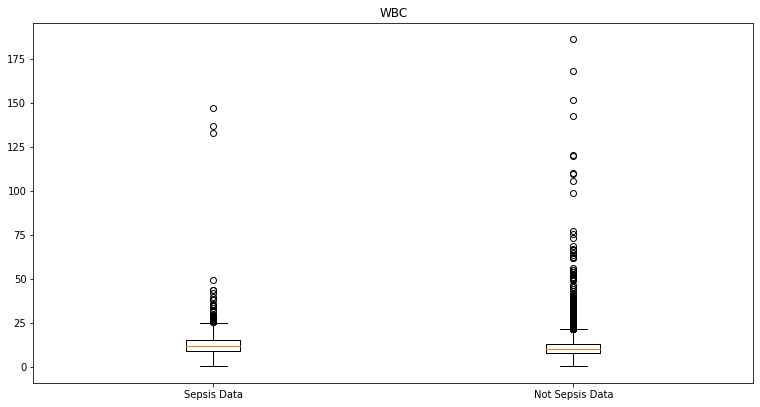

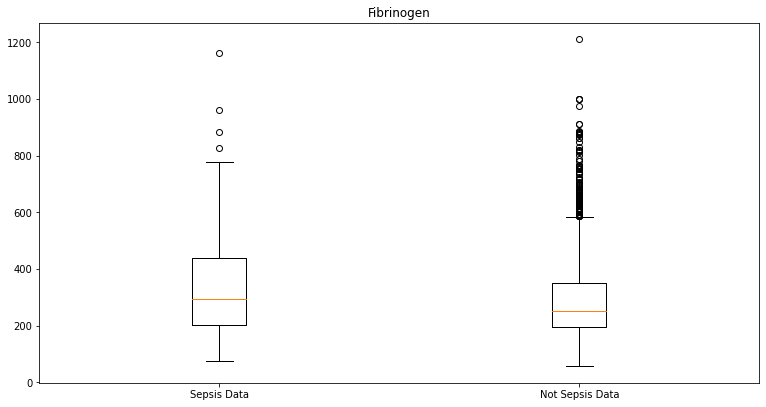

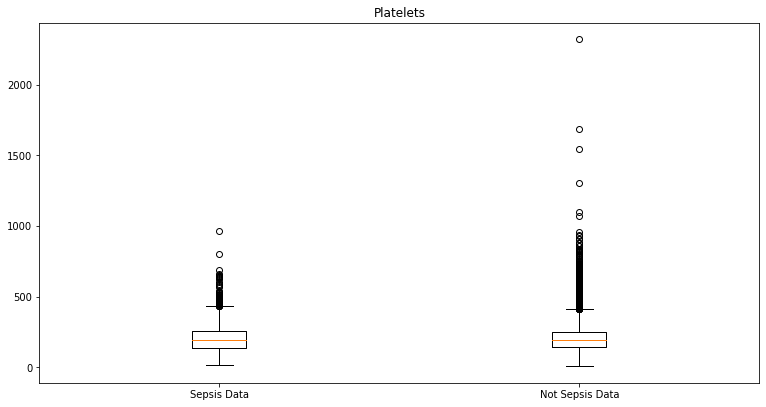

In [55]:
for lab in labs:
    fig = plt.figure(figsize =(10, 5))

    # Creating axes instance
    ax = fig.add_axes([0, 0, 1, 1])

    # Creating plot
    bp = ax.boxplot([np.array(data_sepsis_mean[lab].dropna()), np.array(data_not_sepsis_mean[lab].dropna())])

    # show plot
    ax.set_xticklabels(['Sepsis Data', 'Not Sepsis Data'])
    ax.get_xaxis().tick_bottom()
    plt.title(lab)
    plt.show()

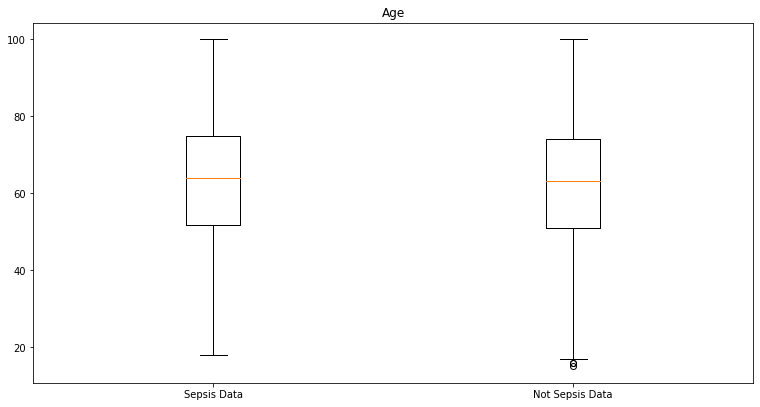

In [59]:
for demog in ['Age']:
    fig = plt.figure(figsize =(10, 5))

    # Creating axes instance
    ax = fig.add_axes([0, 0, 1, 1])

    # Creating plot
    bp = ax.boxplot([np.array(data_sepsis_mean[demog].dropna()), np.array(data_not_sepsis_mean[demog].dropna())])

    # show plot
    ax.set_xticklabels(['Sepsis Data', 'Not Sepsis Data'])
    ax.get_xaxis().tick_bottom()
    plt.title(demog)
    plt.show()

In [62]:
for vital in vitals:
    print(f"T-test {vital} results:")
    print(rp.ttest(group1= data_sepsis_mean[vital], group1_name= "Sepsis",
             group2= data_not_sepsis_mean[vital], group2_name= "Not Sepsis"))

T-test HR results:
(     Variable        N       Mean         SD        SE  95% Conf.   Interval
0      Sepsis   1240.0  88.657913  16.177780  0.459418  87.756590  89.559236
1  Not Sepsis  18582.0  83.419974  14.451731  0.106017  83.212172  83.627776
2    combined  19822.0  83.747642  14.620389  0.103845  83.544098  83.951187,                     Independent t-test     results
0  Difference (Sepsis - Not Sepsis) =       5.2379
1                Degrees of freedom =   19820.0000
2                                 t =      12.2607
3             Two side test p value =       0.0000
4            Difference < 0 p value =       1.0000
5            Difference > 0 p value =       0.0000
6                         Cohen's d =       0.3596
7                         Hedge's g =       0.3596
8                     Glass's delta =       0.3238
9                       Pearson's r =       0.0868)
T-test O2Sat results:
(     Variable        N       Mean        SD        SE  95% Conf.   Interval
0      Sep

In [63]:
for lab in labs:
    print(f"T-test {lab} results:")
    print(rp.ttest(group1= data_sepsis_mean[lab], group1_name= "Sepsis",
             group2= data_not_sepsis_mean[lab], group2_name= "Not Sepsis"))

T-test BaseExcess results:
(     Variable       N      Mean        SD        SE  95% Conf.  Interval
0      Sepsis   626.0 -0.244623  3.909509  0.156255  -0.551473  0.062226
1  Not Sepsis  5811.0 -0.509381  3.868871  0.050753  -0.608876 -0.409887
2    combined  6437.0 -0.483634  3.873330  0.048277  -0.578273 -0.388994,                     Independent t-test    results
0  Difference (Sepsis - Not Sepsis) =      0.2648
1                Degrees of freedom =   6435.0000
2                                 t =      1.6251
3             Two side test p value =      0.1042
4            Difference < 0 p value =      0.9479
5            Difference > 0 p value =      0.0521
6                         Cohen's d =      0.0684
7                         Hedge's g =      0.0684
8                     Glass's delta =      0.0677
9                       Pearson's r =      0.0203)
T-test HCO3 results:
(     Variable       N       Mean        SD        SE  95% Conf.   Interval
0      Sepsis   694.0  24.02048

(     Variable       N      Mean         SD        SE  95% Conf.  Interval
0      Sepsis   176.0  6.080841  18.728365  1.411704   3.294685  8.866996
1  Not Sepsis  3303.0  5.380347  18.847759  0.327948   4.737344  6.023350
2    combined  3479.0  5.415784  18.839685  0.319408   4.789537  6.042031,                     Independent t-test    results
0  Difference (Sepsis - Not Sepsis) =      0.7005
1                Degrees of freedom =   3477.0000
2                                 t =      0.4806
3             Two side test p value =      0.6308
4            Difference < 0 p value =      0.6846
5            Difference > 0 p value =      0.3154
6                         Cohen's d =      0.0372
7                         Hedge's g =      0.0372
8                     Glass's delta =      0.0374
9                       Pearson's r =      0.0081)
T-test Hct results:
(     Variable        N       Mean        SD        SE  95% Conf.   Interval
0      Sepsis   1068.0  31.042274  5.184832  0.158653 